1) Read the data
2) Data quality checks
3) Impute the missing values
4) Perform the outlier analysis and impute with median
5) Drop the ID columns
6) Apply Feature selection only on Numerical columns
7) Apply label encoder
8) Standardize the data
9) PCA 
10) Develop the model on PCA data with hyper parameter tuning
11) Download the test data
12) Apply the same concepts on test data also(PCA)
13) Pass this to the model and get the predictions
14) Upload the solution file on analytics Vidhya website
15) Submit the solution file and screen shot

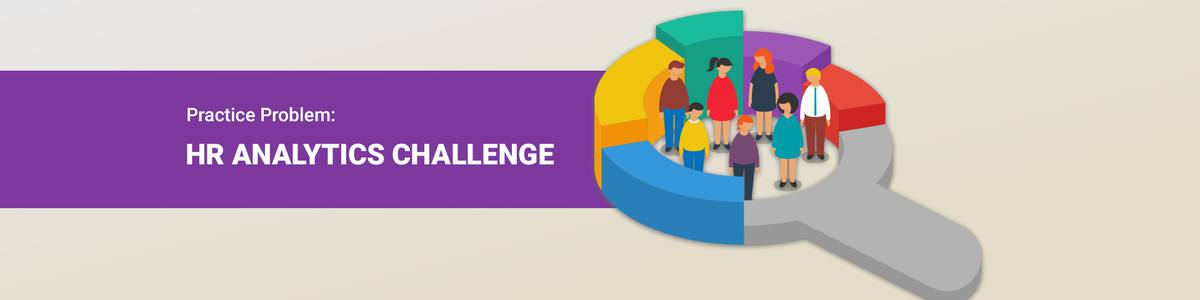

# Objective  - HR Analytics

# Exploratory Data Analysis (EDA)

# 1. Load Python Modules

In [157]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [158]:
file_path=r"train_data.csv"
hr_df=pd.read_csv(file_path)
hr_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [159]:
#drop - sensitive - non imp columns for data analysis 
print(hr_df["employee_id"].nunique())
hr_df.drop("employee_id",axis=1,inplace=True)
# print columns names
print(hr_df.columns)

54808
Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


# 3. Basic Inspection on given dataset

In [160]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(hr_df)

top 5 rows - using head
          department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1     

**Observations**

- HR Dataset is a machine learning classification task.
- is_promoted  is the target column and did not have any null values.
- We have 12 Independent Variables, with 5 as categorical and the rest are numerical.
- Observed missing values in education in Categorical Columns.
- Observed missing values in previous_year_rating  in Numerical Columns.
- We have a total of 54808 records/samples/observations.


# 4. Handling Missing Values - Categorical - Variables

- Missing Values in Categorical Columns - Replaced with Mode

In [161]:
def print_cat_values(df,cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",df[cat_var].unique())
    print("num of categories:",df[cat_var].nunique())
    print("Value-counts:", df[cat_var].value_counts())  

In [162]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['education']

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [163]:
for var in cat_vars:
    print_cat_values(hr_df,var)
    print("=========================================")
    print()

We are studying about varailbe/column/feature : education
categories: ["Master's & above" "Bachelor's" nan 'Below Secondary']
num of categories: 3
Value-counts: education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64



In [164]:
for var in cat_vars:
    mode = hr_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    hr_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

- Categorical Uni Variate Analysis
- Frequency Table
- Relative Frequency Table
- Bar Chart
- Pi Chart

In [165]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

department frequency table
+---+-------------------+-----------+
|   |       Class       | Frequency |
+---+-------------------+-----------+
| 0 | Sales & Marketing |   16840   |
| 1 |    Operations     |   11348   |
| 2 |    Technology     |   7138    |
| 3 |    Procurement    |   7138    |
| 4 |     Analytics     |   5352    |
| 5 |      Finance      |   2536    |
| 6 |        HR         |   2418    |
| 7 |       Legal       |   1039    |
| 8 |        R&D        |    999    |
+---+-------------------+-----------+
department Relative frequency table
+---+-------------------+-----------+----------------------+
|   |       Class       | Frequency | Relative Frequency % |
+---+-------------------+-----------+----------------------+
| 0 | Sales & Marketing |   16840   |        30.73         |
| 1 |    Operations     |   11348   |        20.71         |
| 2 |    Technology     |   7138    |        13.02         |
| 3 |    Procurement    |   7138    |        13.02         |
| 4 |     Analyt

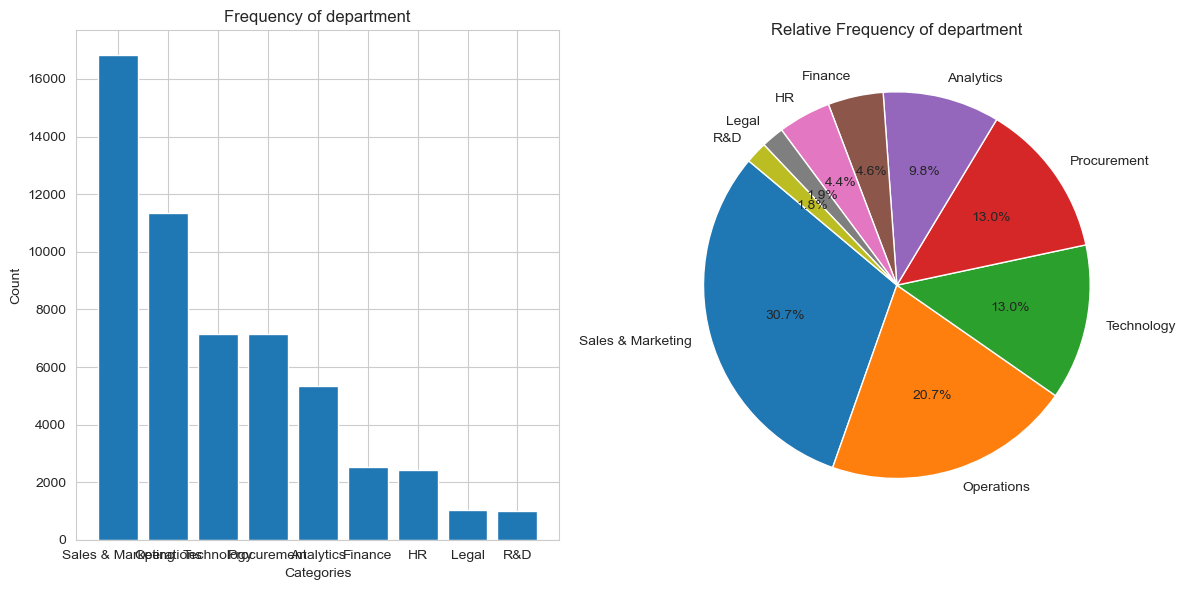

region frequency table
+----+-----------+-----------+
|    |   Class   | Frequency |
+----+-----------+-----------+
| 0  | region_2  |   12343   |
| 1  | region_22 |   6428    |
| 2  | region_7  |   4843    |
| 3  | region_15 |   2808    |
| 4  | region_13 |   2648    |
| 5  | region_26 |   2260    |
| 6  | region_31 |   1935    |
| 7  | region_4  |   1703    |
| 8  | region_27 |   1659    |
| 9  | region_16 |   1465    |
| 10 | region_28 |   1318    |
| 11 | region_11 |   1315    |
| 12 | region_23 |   1175    |
| 13 | region_29 |    994    |
| 14 | region_32 |    945    |
| 15 | region_19 |    874    |
| 16 | region_20 |    850    |
| 17 | region_14 |    827    |
| 18 | region_25 |    819    |
| 19 | region_17 |    796    |
| 20 | region_5  |    766    |
| 21 | region_6  |    690    |
| 22 | region_30 |    657    |
| 23 | region_8  |    655    |
| 24 | region_10 |    648    |
| 25 | region_1  |    610    |
| 26 | region_24 |    508    |
| 27 | region_12 |    500    |
| 28 | region_9 

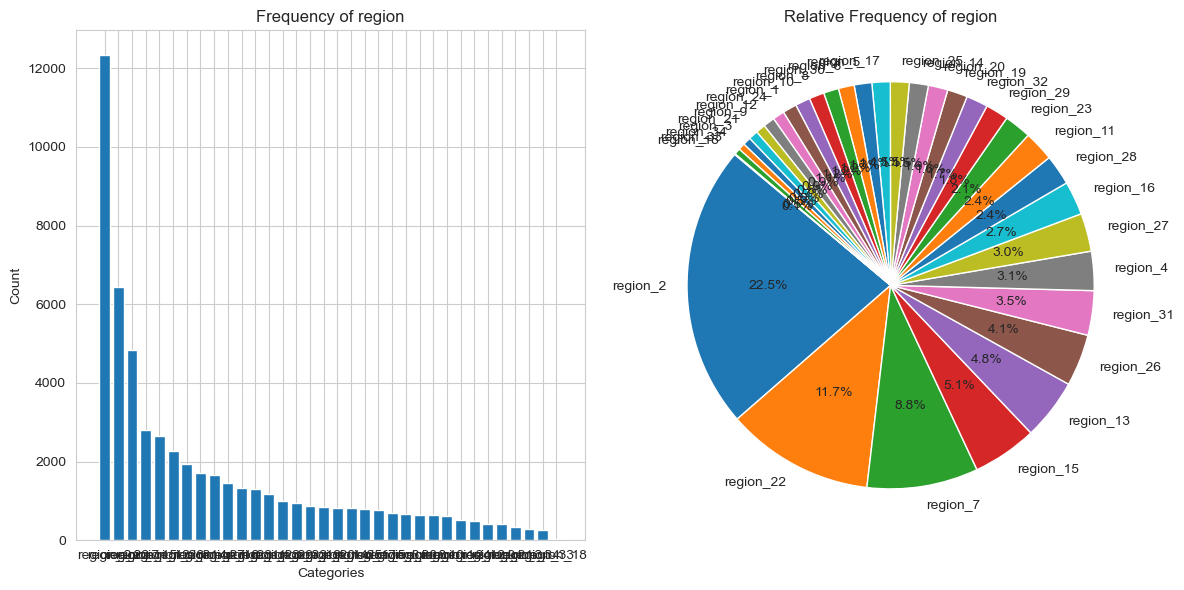

education frequency table
+---+------------------+-----------+
|   |      Class       | Frequency |
+---+------------------+-----------+
| 0 |    Bachelor's    |   39078   |
| 1 | Master's & above |   14925   |
| 2 | Below Secondary  |    805    |
+---+------------------+-----------+
education Relative frequency table
+---+------------------+-----------+----------------------+
|   |      Class       | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |    Bachelor's    |   39078   |         71.3         |
| 1 | Master's & above |   14925   |        27.23         |
| 2 | Below Secondary  |    805    |         1.47         |
+---+------------------+-----------+----------------------+


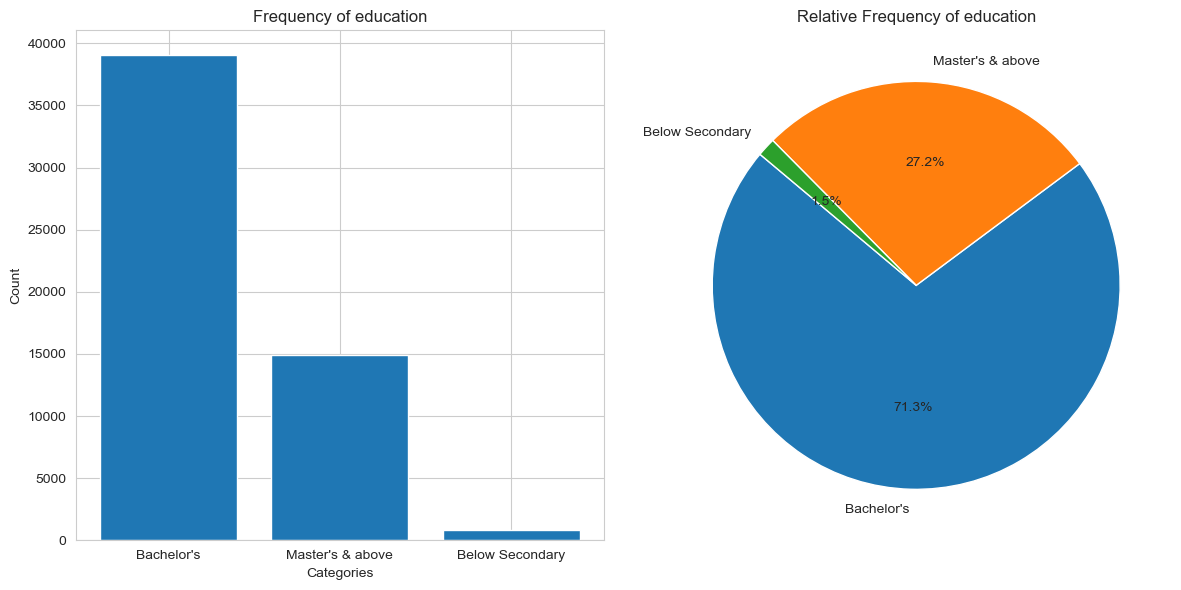

gender frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   m   |   38496   |
| 1 |   f   |   16312   |
+---+-------+-----------+
gender Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   m   |   38496   |        70.24         |
| 1 |   f   |   16312   |        29.76         |
+---+-------+-----------+----------------------+


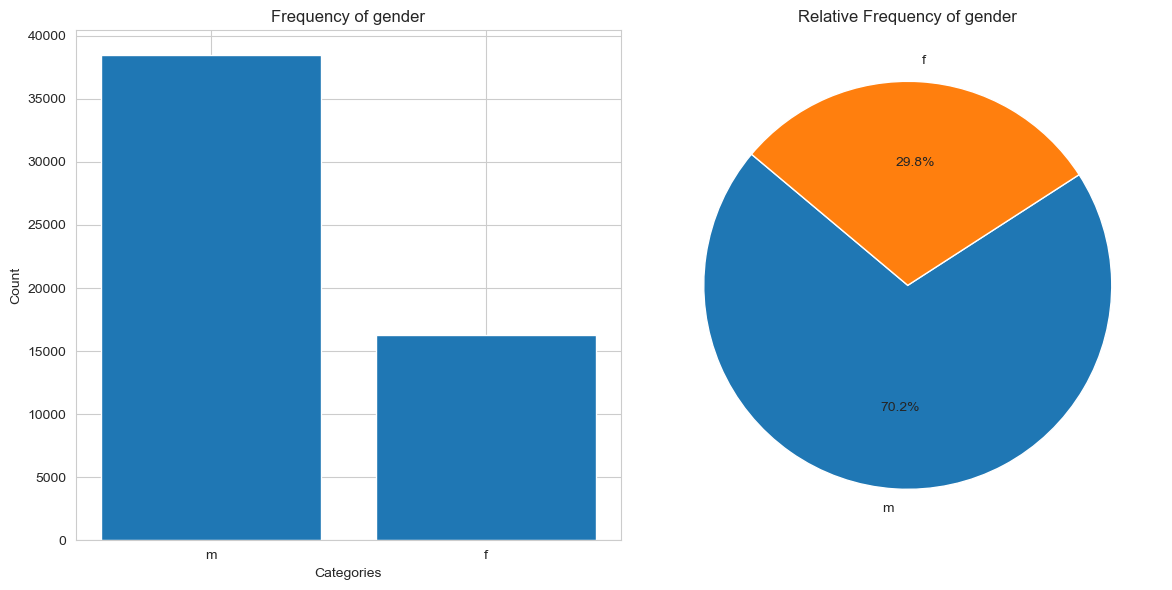

recruitment_channel frequency table
+---+----------+-----------+
|   |  Class   | Frequency |
+---+----------+-----------+
| 0 |  other   |   30446   |
| 1 | sourcing |   23220   |
| 2 | referred |   1142    |
+---+----------+-----------+
recruitment_channel Relative frequency table
+---+----------+-----------+----------------------+
|   |  Class   | Frequency | Relative Frequency % |
+---+----------+-----------+----------------------+
| 0 |  other   |   30446   |        55.55         |
| 1 | sourcing |   23220   |        42.37         |
| 2 | referred |   1142    |         2.08         |
+---+----------+-----------+----------------------+


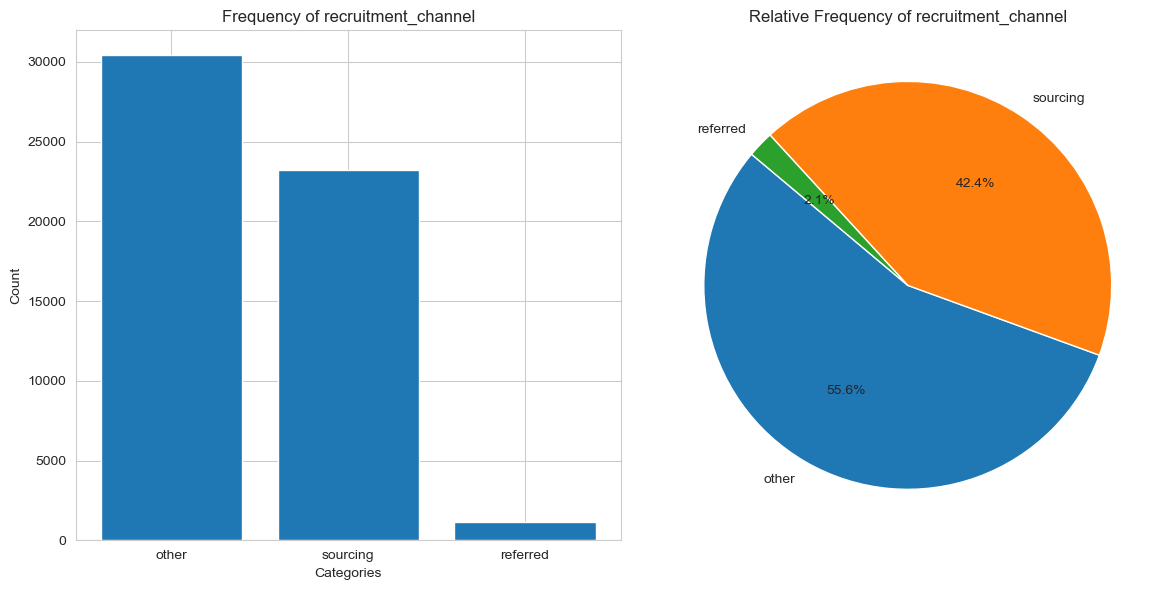

In [166]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(hr_df)

**Observations**





# 6. Handling Missing Values in Numerical Columns

- Handling the Missing Values in Numerical Columns by median

In [167]:
hr_df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [168]:
hr_df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [169]:
for var in ["previous_year_rating"]:
    median = hr_df[var].median()
    #print(median)

    # fill the missing value with mode
    hr_df[var].fillna(median,inplace=True)
    
# check for missing values - for confirmation
hr_df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

- Numerical Uni Variate Analysis
- Frequency Interval Data Distribution
- Box Plot
- Histogram with KDE
- Histogram

In [170]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        
        

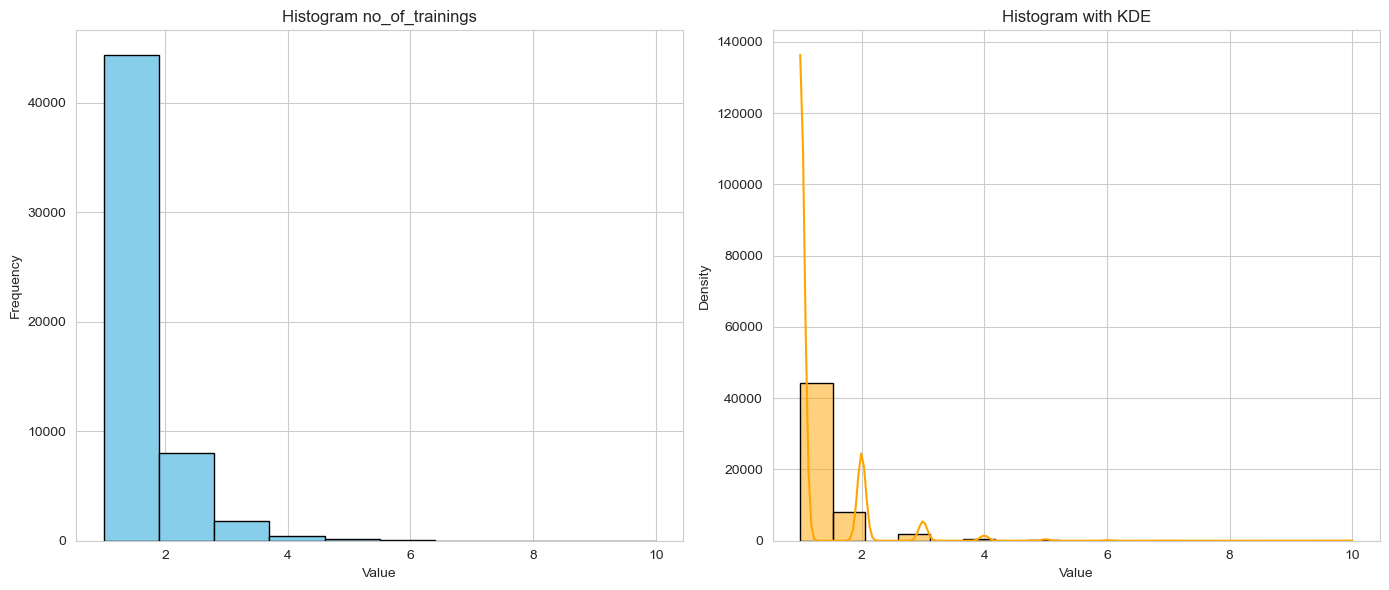

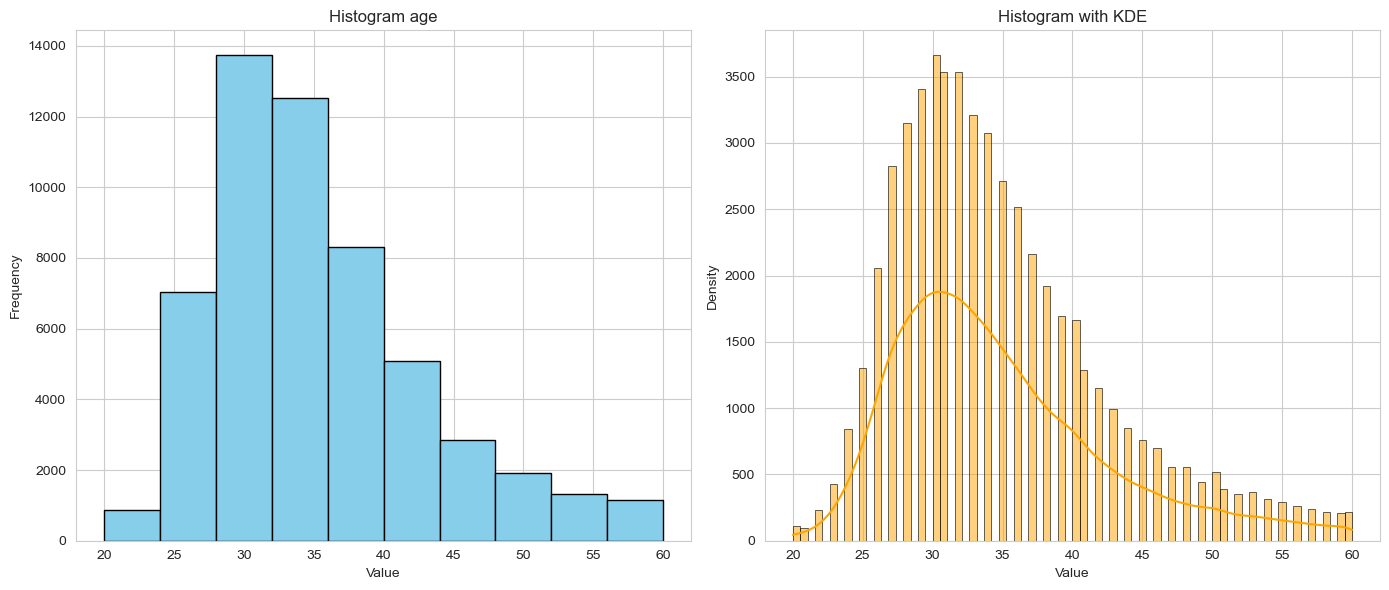

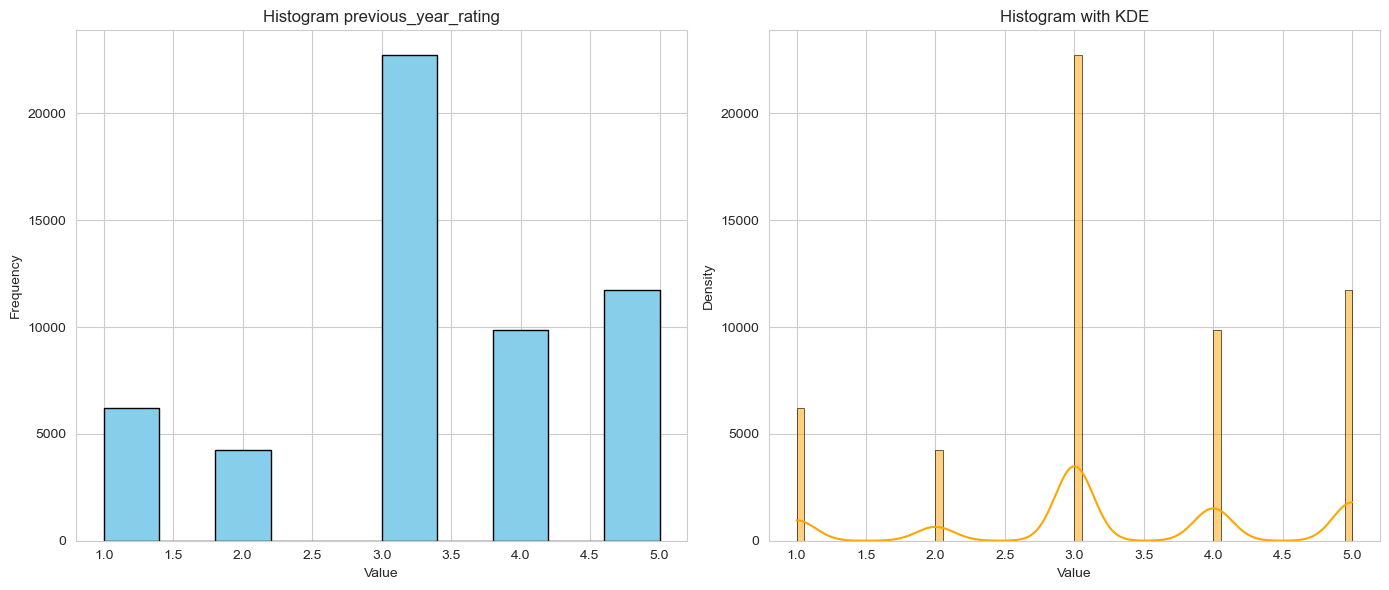

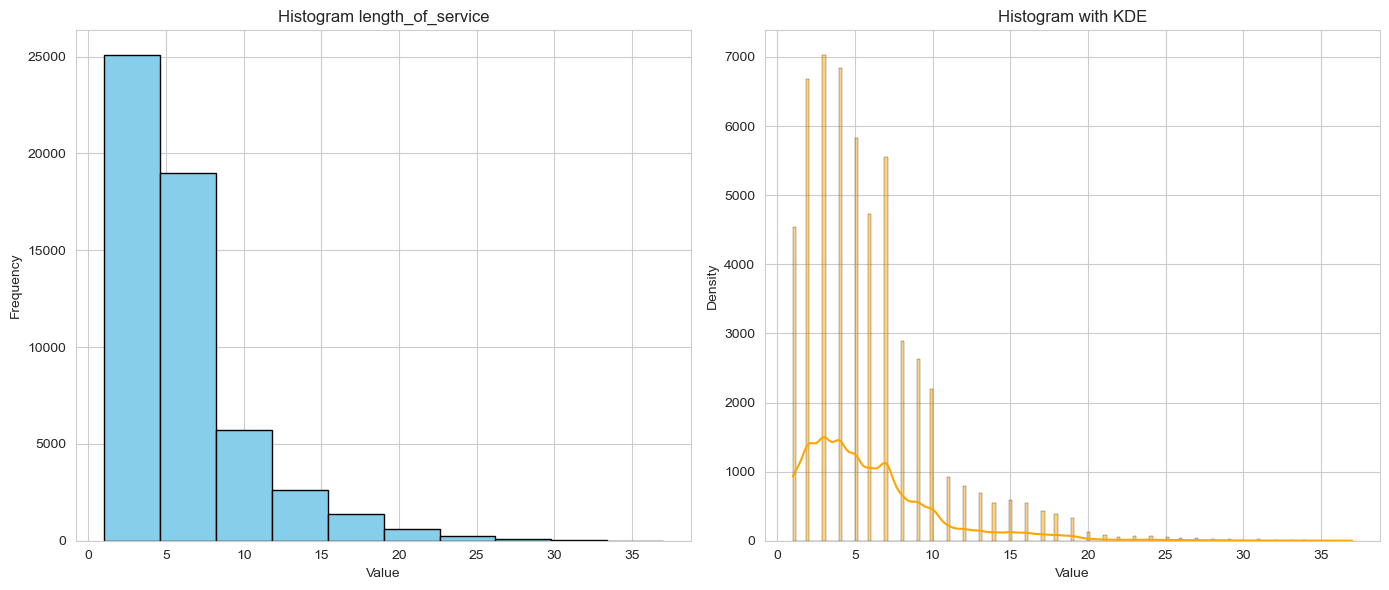

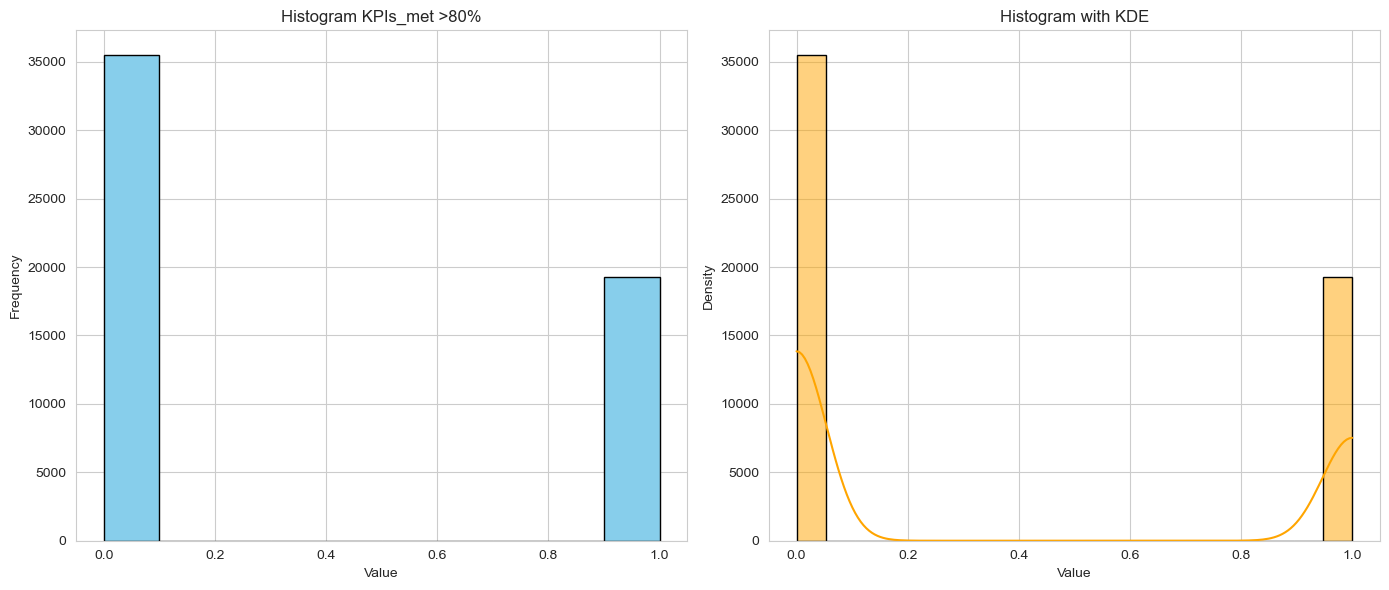

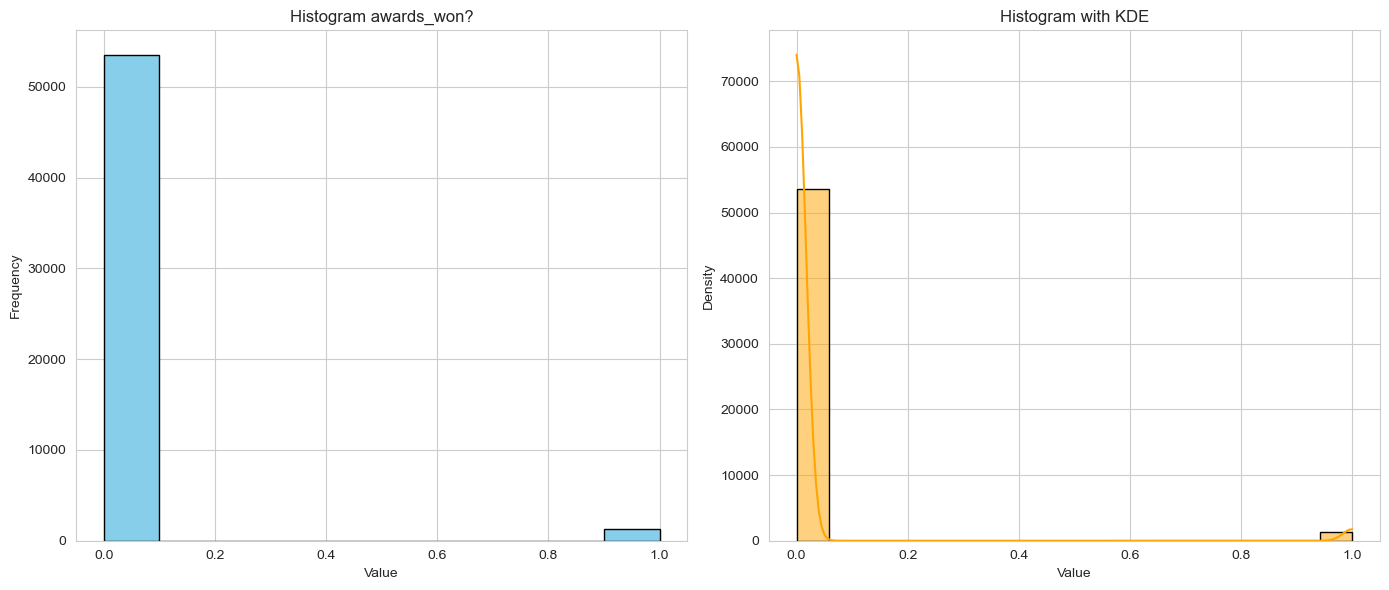

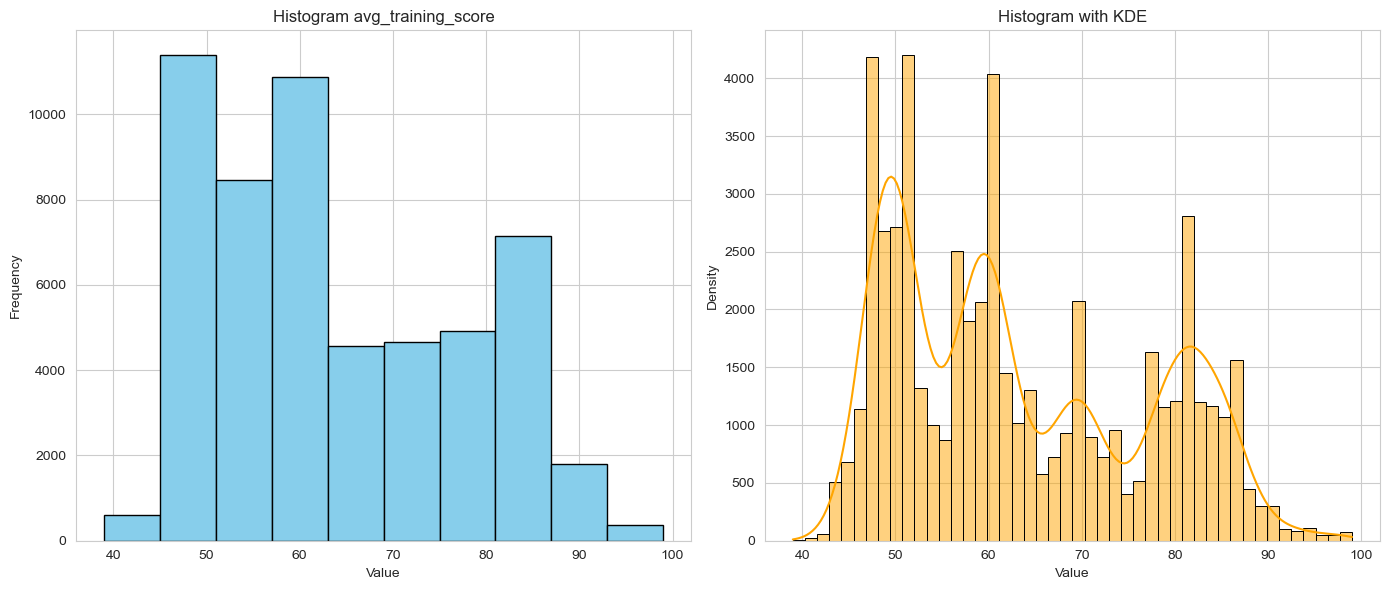

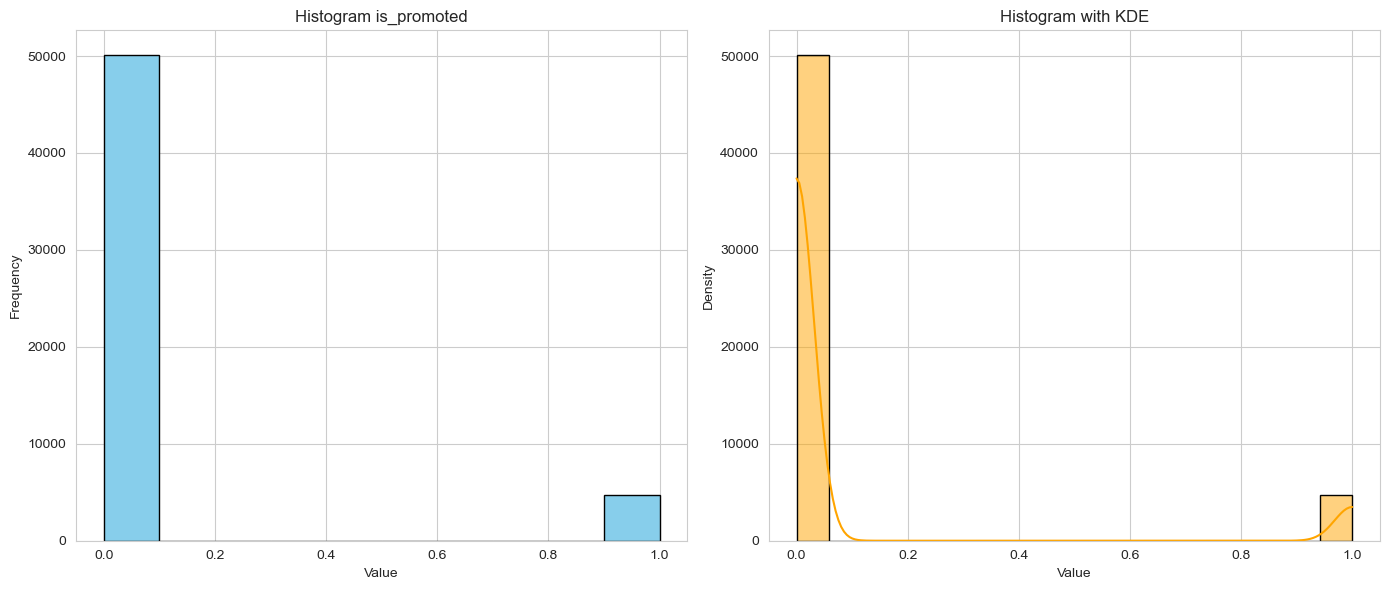

In [171]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_df)

**Observations**

- is_promoted, awards_won,kpi_met - we can tranform to cat
- it is imbalanced dataset


# Convert Columns Proper Datatype( Num to Cat)

In [172]:
# Convert numerical column to categorical column
hr_df['is_promoted_cat'] = hr_df['is_promoted'].map({1: 'Yes', 0: 'No'})
hr_df['awards_won_cat'] = hr_df['awards_won?'].map({1: 'Yes', 0: 'No'})
hr_df['KPIs_met_cat'] = hr_df['KPIs_met >80%'].map({1: 'Yes', 0: 'No'})


In [173]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

ratings = hr_df["previous_year_rating"]
# Fit and transform the ratings
encoded_ratings = label_encoder.fit_transform(ratings)
# Replace the original column with the encoded values
hr_df["previous_year_rating"] = encoded_ratings

trainings=hr_df["no_of_trainings"]
encoded_trainings = label_encoder.fit_transform(trainings)
hr_df["no_of_trainings"] = encoded_trainings
hr_df["previous_year_rating"] = hr_df["previous_year_rating"].astype("object")
hr_df["no_of_trainings"] = hr_df["no_of_trainings"].astype("object")

In [174]:
hr_df.drop("is_promoted",axis=1,inplace=True)
hr_df.drop("awards_won?",axis=1,inplace=True)
hr_df.drop("KPIs_met >80%",axis=1,inplace=True)

In [175]:
hr_df.dtypes

department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings         object
age                      int64
previous_year_rating    object
length_of_service        int64
avg_training_score       int64
is_promoted_cat         object
awards_won_cat          object
KPIs_met_cat            object
dtype: object

department frequency table
+---+-------------------+-----------+
|   |       Class       | Frequency |
+---+-------------------+-----------+
| 0 | Sales & Marketing |   16840   |
| 1 |    Operations     |   11348   |
| 2 |    Technology     |   7138    |
| 3 |    Procurement    |   7138    |
| 4 |     Analytics     |   5352    |
| 5 |      Finance      |   2536    |
| 6 |        HR         |   2418    |
| 7 |       Legal       |   1039    |
| 8 |        R&D        |    999    |
+---+-------------------+-----------+
department Relative frequency table
+---+-------------------+-----------+----------------------+
|   |       Class       | Frequency | Relative Frequency % |
+---+-------------------+-----------+----------------------+
| 0 | Sales & Marketing |   16840   |        30.73         |
| 1 |    Operations     |   11348   |        20.71         |
| 2 |    Technology     |   7138    |        13.02         |
| 3 |    Procurement    |   7138    |        13.02         |
| 4 |     Analyt

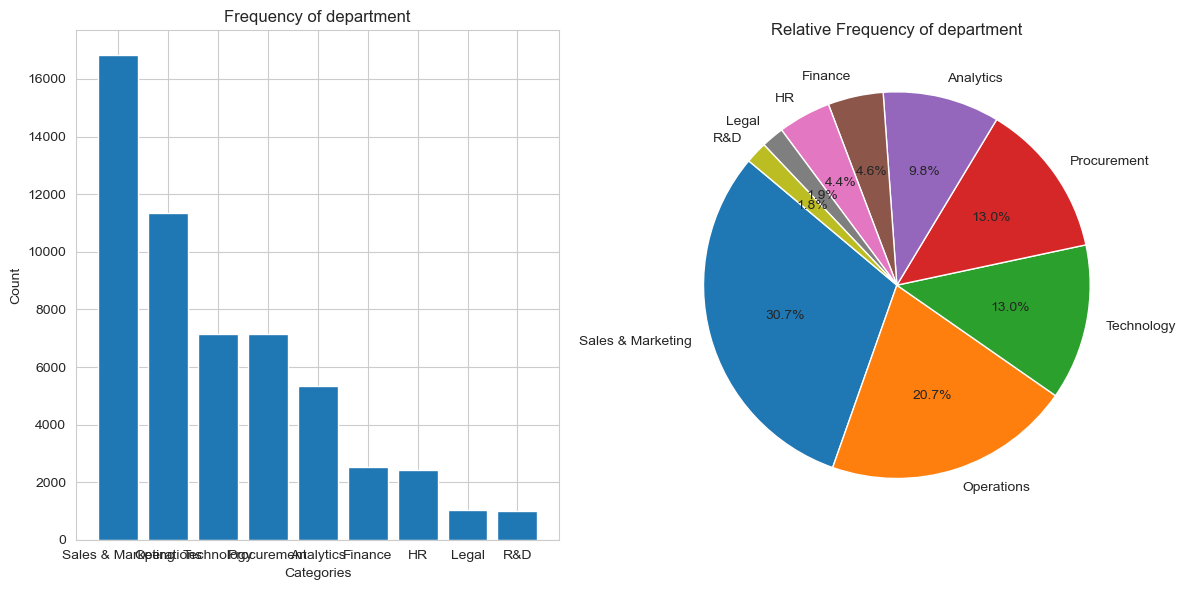

region frequency table
+----+-----------+-----------+
|    |   Class   | Frequency |
+----+-----------+-----------+
| 0  | region_2  |   12343   |
| 1  | region_22 |   6428    |
| 2  | region_7  |   4843    |
| 3  | region_15 |   2808    |
| 4  | region_13 |   2648    |
| 5  | region_26 |   2260    |
| 6  | region_31 |   1935    |
| 7  | region_4  |   1703    |
| 8  | region_27 |   1659    |
| 9  | region_16 |   1465    |
| 10 | region_28 |   1318    |
| 11 | region_11 |   1315    |
| 12 | region_23 |   1175    |
| 13 | region_29 |    994    |
| 14 | region_32 |    945    |
| 15 | region_19 |    874    |
| 16 | region_20 |    850    |
| 17 | region_14 |    827    |
| 18 | region_25 |    819    |
| 19 | region_17 |    796    |
| 20 | region_5  |    766    |
| 21 | region_6  |    690    |
| 22 | region_30 |    657    |
| 23 | region_8  |    655    |
| 24 | region_10 |    648    |
| 25 | region_1  |    610    |
| 26 | region_24 |    508    |
| 27 | region_12 |    500    |
| 28 | region_9 

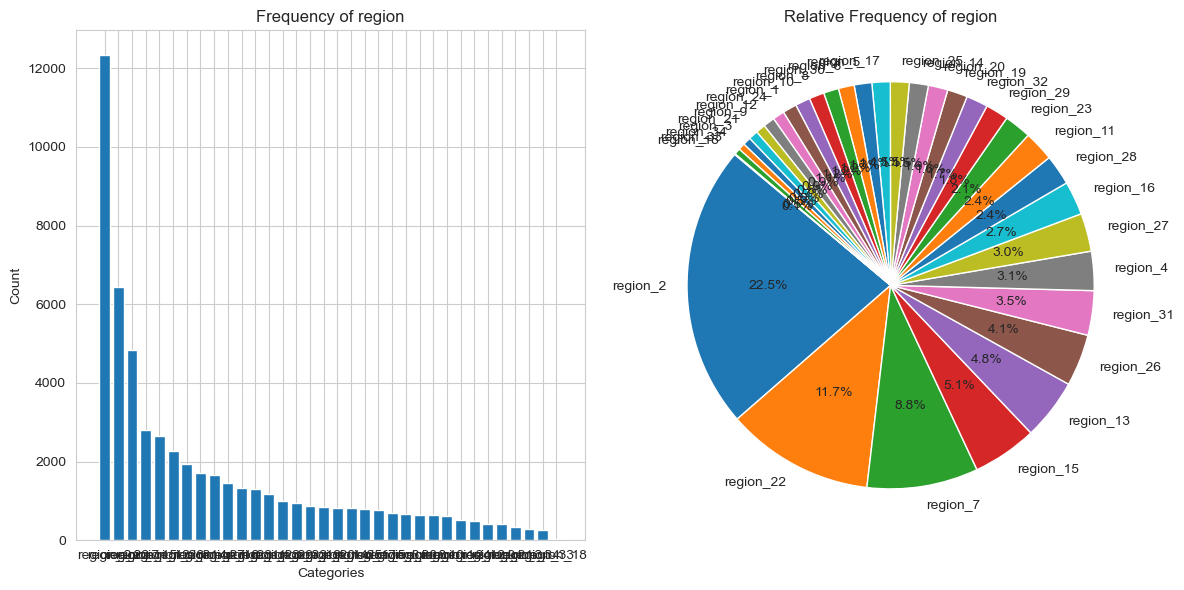

education frequency table
+---+------------------+-----------+
|   |      Class       | Frequency |
+---+------------------+-----------+
| 0 |    Bachelor's    |   39078   |
| 1 | Master's & above |   14925   |
| 2 | Below Secondary  |    805    |
+---+------------------+-----------+
education Relative frequency table
+---+------------------+-----------+----------------------+
|   |      Class       | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |    Bachelor's    |   39078   |         71.3         |
| 1 | Master's & above |   14925   |        27.23         |
| 2 | Below Secondary  |    805    |         1.47         |
+---+------------------+-----------+----------------------+


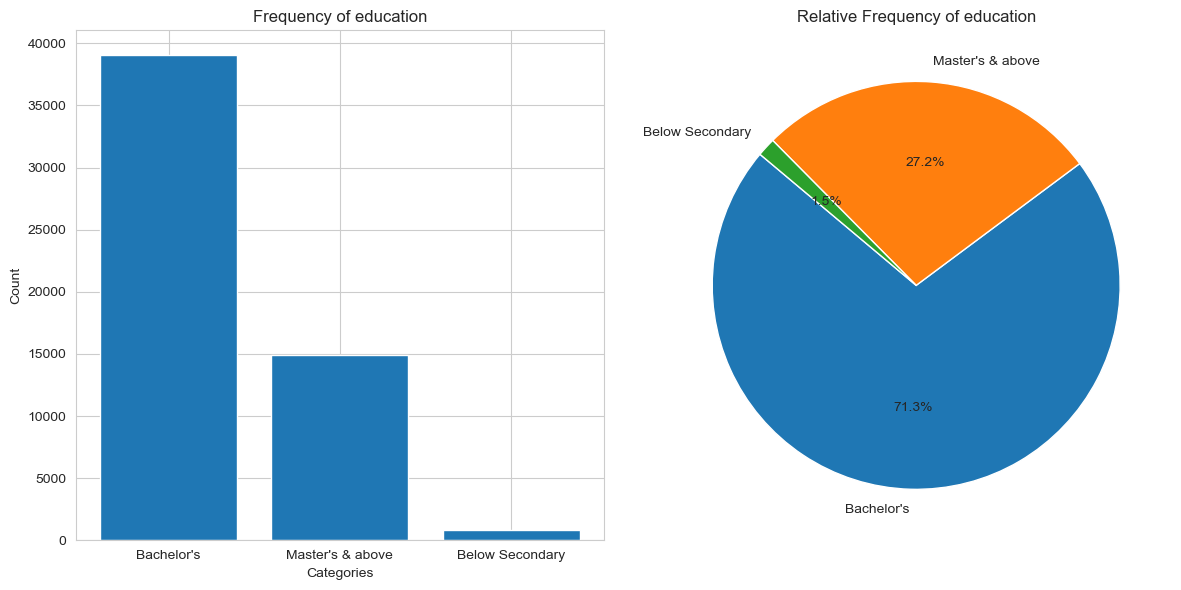

gender frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   m   |   38496   |
| 1 |   f   |   16312   |
+---+-------+-----------+
gender Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   m   |   38496   |        70.24         |
| 1 |   f   |   16312   |        29.76         |
+---+-------+-----------+----------------------+


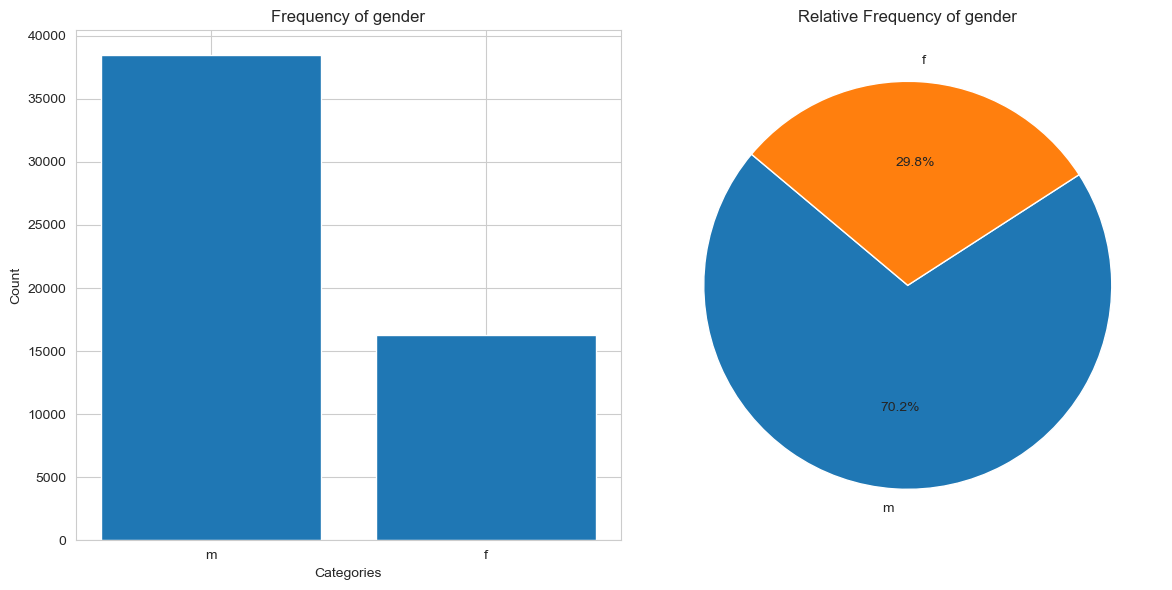

recruitment_channel frequency table
+---+----------+-----------+
|   |  Class   | Frequency |
+---+----------+-----------+
| 0 |  other   |   30446   |
| 1 | sourcing |   23220   |
| 2 | referred |   1142    |
+---+----------+-----------+
recruitment_channel Relative frequency table
+---+----------+-----------+----------------------+
|   |  Class   | Frequency | Relative Frequency % |
+---+----------+-----------+----------------------+
| 0 |  other   |   30446   |        55.55         |
| 1 | sourcing |   23220   |        42.37         |
| 2 | referred |   1142    |         2.08         |
+---+----------+-----------+----------------------+


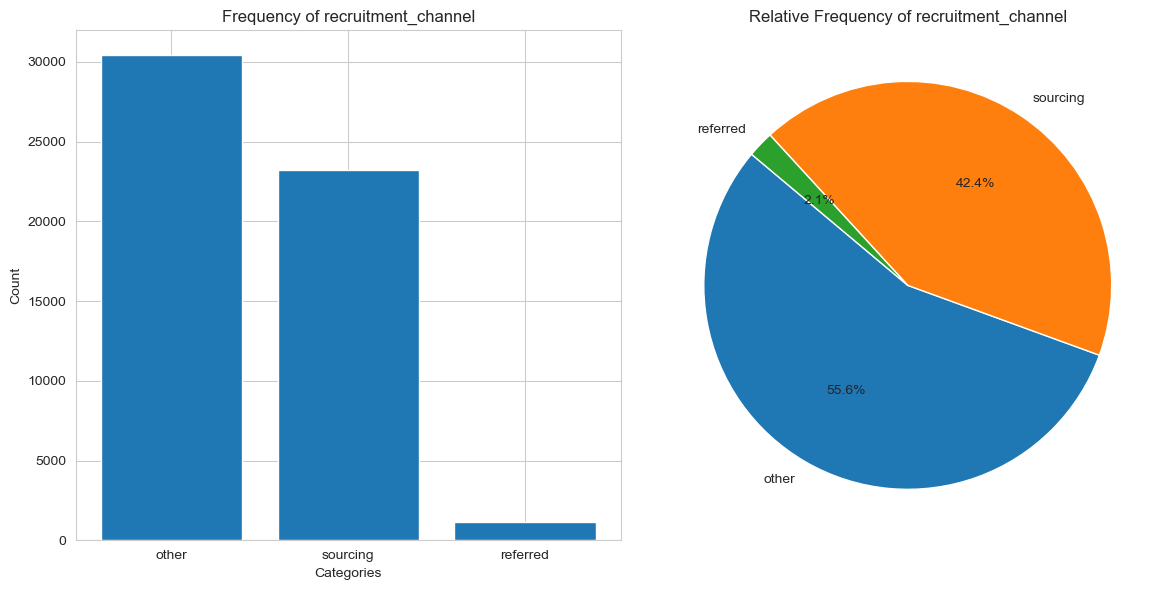

no_of_trainings frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |   44378   |
| 1 |   1   |   7987    |
| 2 |   2   |   1776    |
| 3 |   3   |    468    |
| 4 |   4   |    128    |
| 5 |   5   |    44     |
| 6 |   6   |    12     |
| 7 |   7   |     5     |
| 8 |   9   |     5     |
| 9 |   8   |     5     |
+---+-------+-----------+
no_of_trainings Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |  44378.0  |        80.97         |
| 1 |  1.0  |  7987.0   |        14.57         |
| 2 |  2.0  |  1776.0   |         3.24         |
| 3 |  3.0  |   468.0   |         0.85         |
| 4 |  4.0  |   128.0   |         0.23         |
| 5 |  5.0  |   44.0    |         0.08         |
| 6 |  6.0  |   12.0    |         0.02         |
| 7 |  7.0  |    5.0    |         0.01         |
| 8 |  9.0  |    5.0    

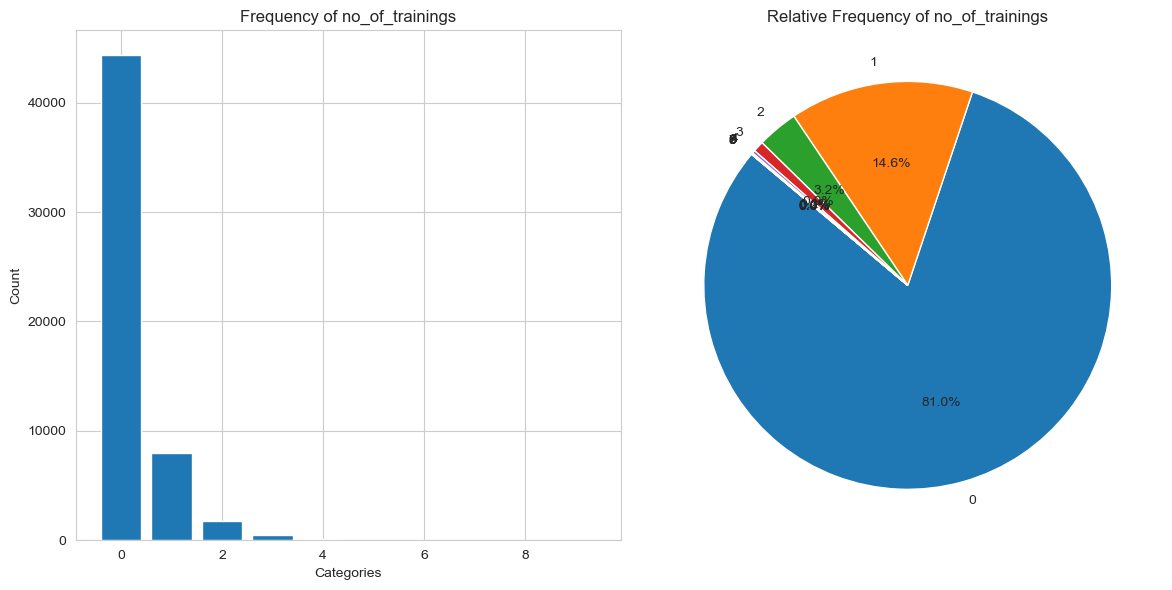

previous_year_rating frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   2   |   22742   |
| 1 |   4   |   11741   |
| 2 |   3   |   9877    |
| 3 |   0   |   6223    |
| 4 |   1   |   4225    |
+---+-------+-----------+
previous_year_rating Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  2.0  |  22742.0  |        41.49         |
| 1 |  4.0  |  11741.0  |        21.42         |
| 2 |  3.0  |  9877.0   |        18.02         |
| 3 |  0.0  |  6223.0   |        11.35         |
| 4 |  1.0  |  4225.0   |         7.71         |
+---+-------+-----------+----------------------+


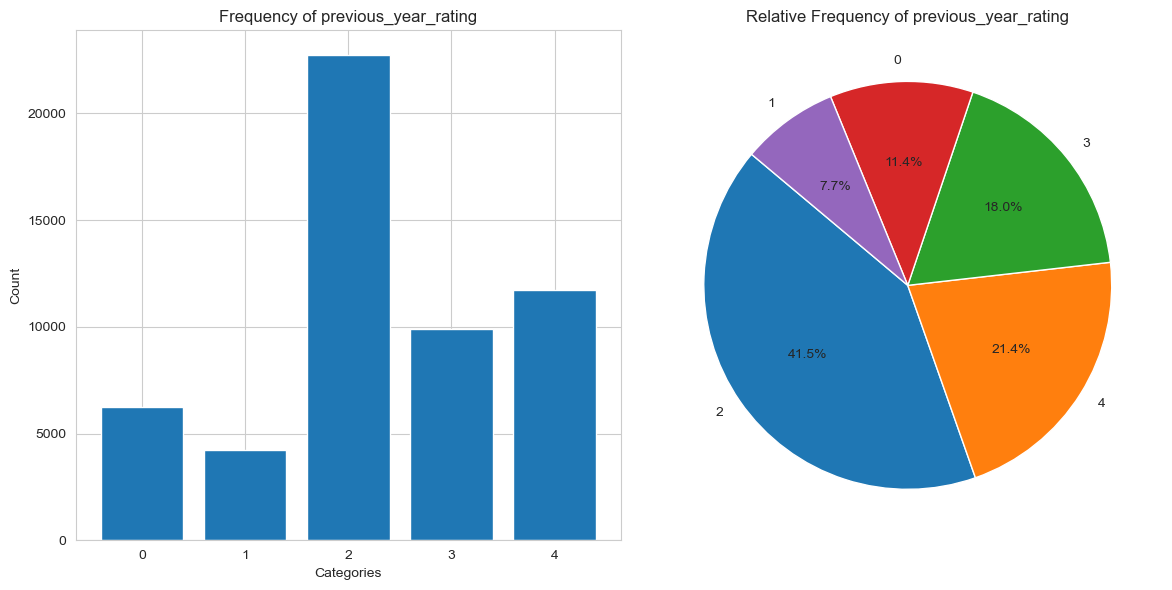

is_promoted_cat frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   50140   |
| 1 |  Yes  |   4668    |
+---+-------+-----------+
is_promoted_cat Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   50140   |        91.48         |
| 1 |  Yes  |   4668    |         8.52         |
+---+-------+-----------+----------------------+


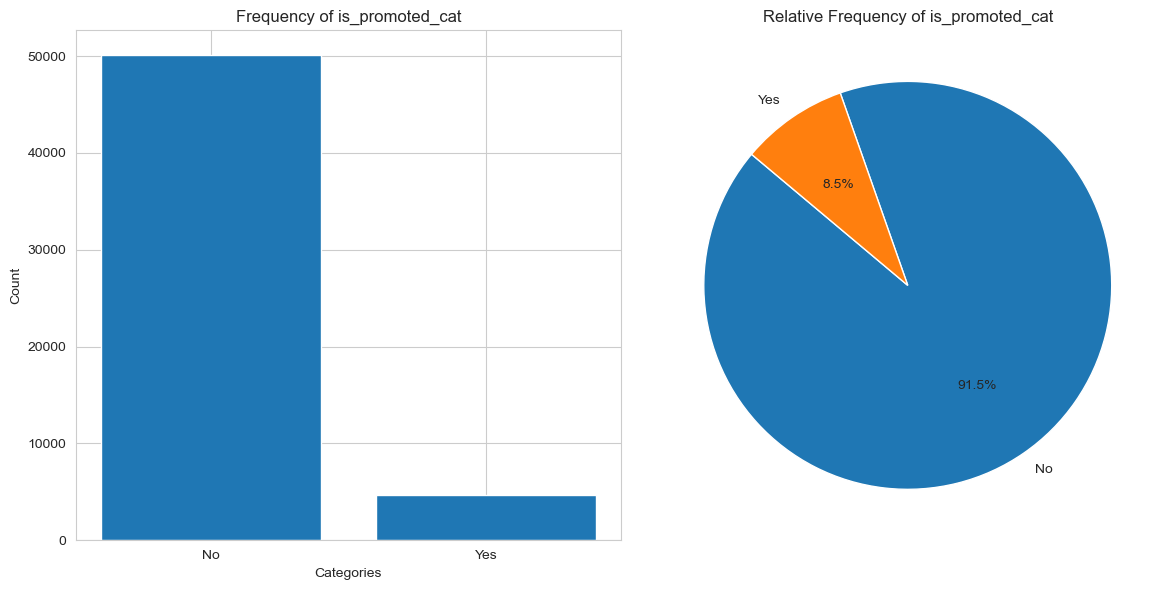

awards_won_cat frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   53538   |
| 1 |  Yes  |   1270    |
+---+-------+-----------+
awards_won_cat Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   53538   |        97.68         |
| 1 |  Yes  |   1270    |         2.32         |
+---+-------+-----------+----------------------+


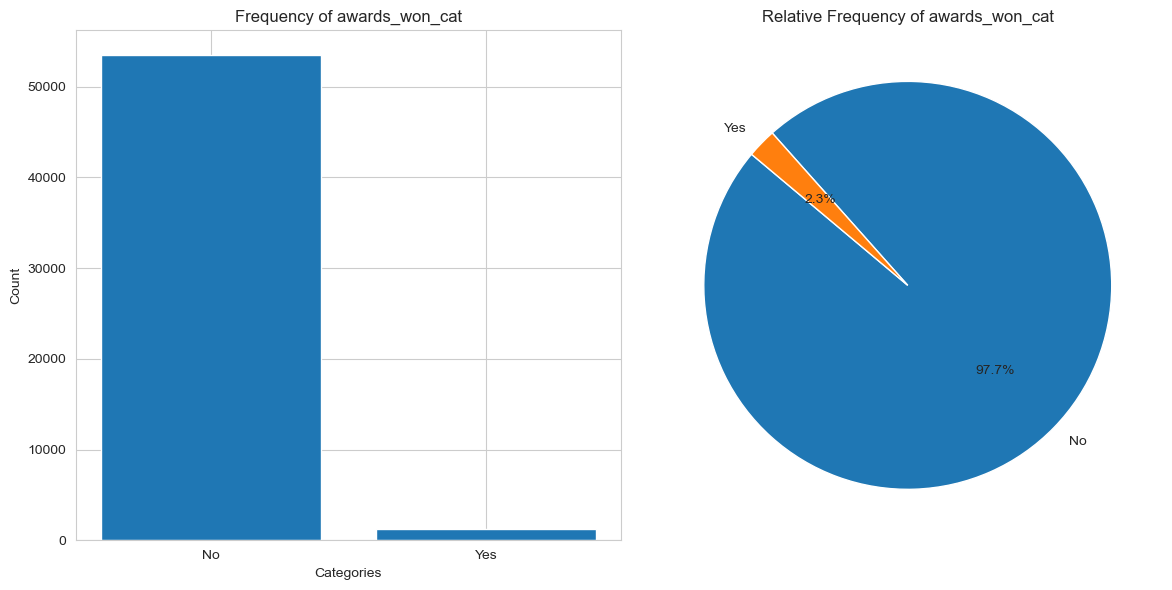

KPIs_met_cat frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   35517   |
| 1 |  Yes  |   19291   |
+---+-------+-----------+
KPIs_met_cat Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   35517   |         64.8         |
| 1 |  Yes  |   19291   |         35.2         |
+---+-------+-----------+----------------------+


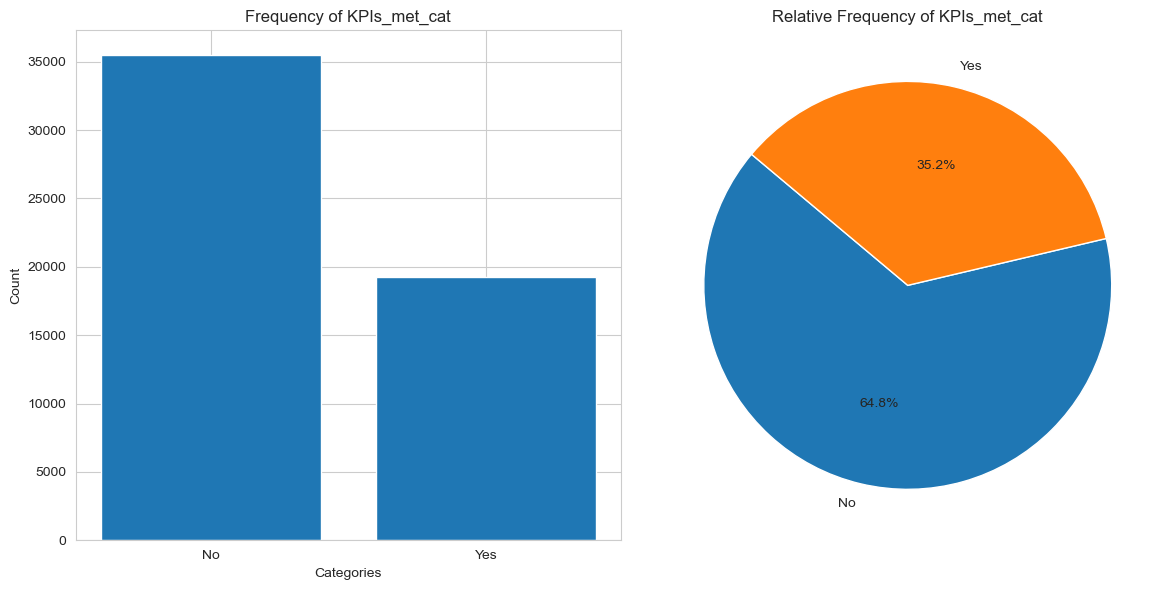

In [176]:
processed_data = pipeline_cat_var.fit_transform(hr_df)

# 8. Numerical - Variables -Outliers Analysis - fillit

- Fill the outliers in Numericals cols with median

In [177]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'is_promoted_cat',
       'awards_won_cat', 'KPIs_met_cat'],
      dtype='object')


In [178]:
num_vars = hr_df.select_dtypes(exclude="object").columns
print(num_vars)

Index(['age', 'length_of_service', 'avg_training_score'], dtype='object')


# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [179]:
cat_vars = hr_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat',  'no_of_trainings', 'previous_year_rating']

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'is_promoted_cat',
       'awards_won_cat', 'KPIs_met_cat'],
      dtype='object')


is_promoted_cat       No   Yes
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768
is_promoted_cat     No  Yes
region                     
region_1           552   58
region_10          597   51
region_11         1241   74
region_12          467   33
region_13         2418  230
region_14          765   62
region_15         2586  222
region_16         1363  102
region_17          687  109
region_18           30    1
region_19          821   53
region_2         11354  989
region_20          801   49
region_21          393   18
region_22         5694  734
region_23         1038  137
region_24          490   18
region_25          716  103
region_26         2117  143
region_27         1528  131
region_28         1164  154
region_29      

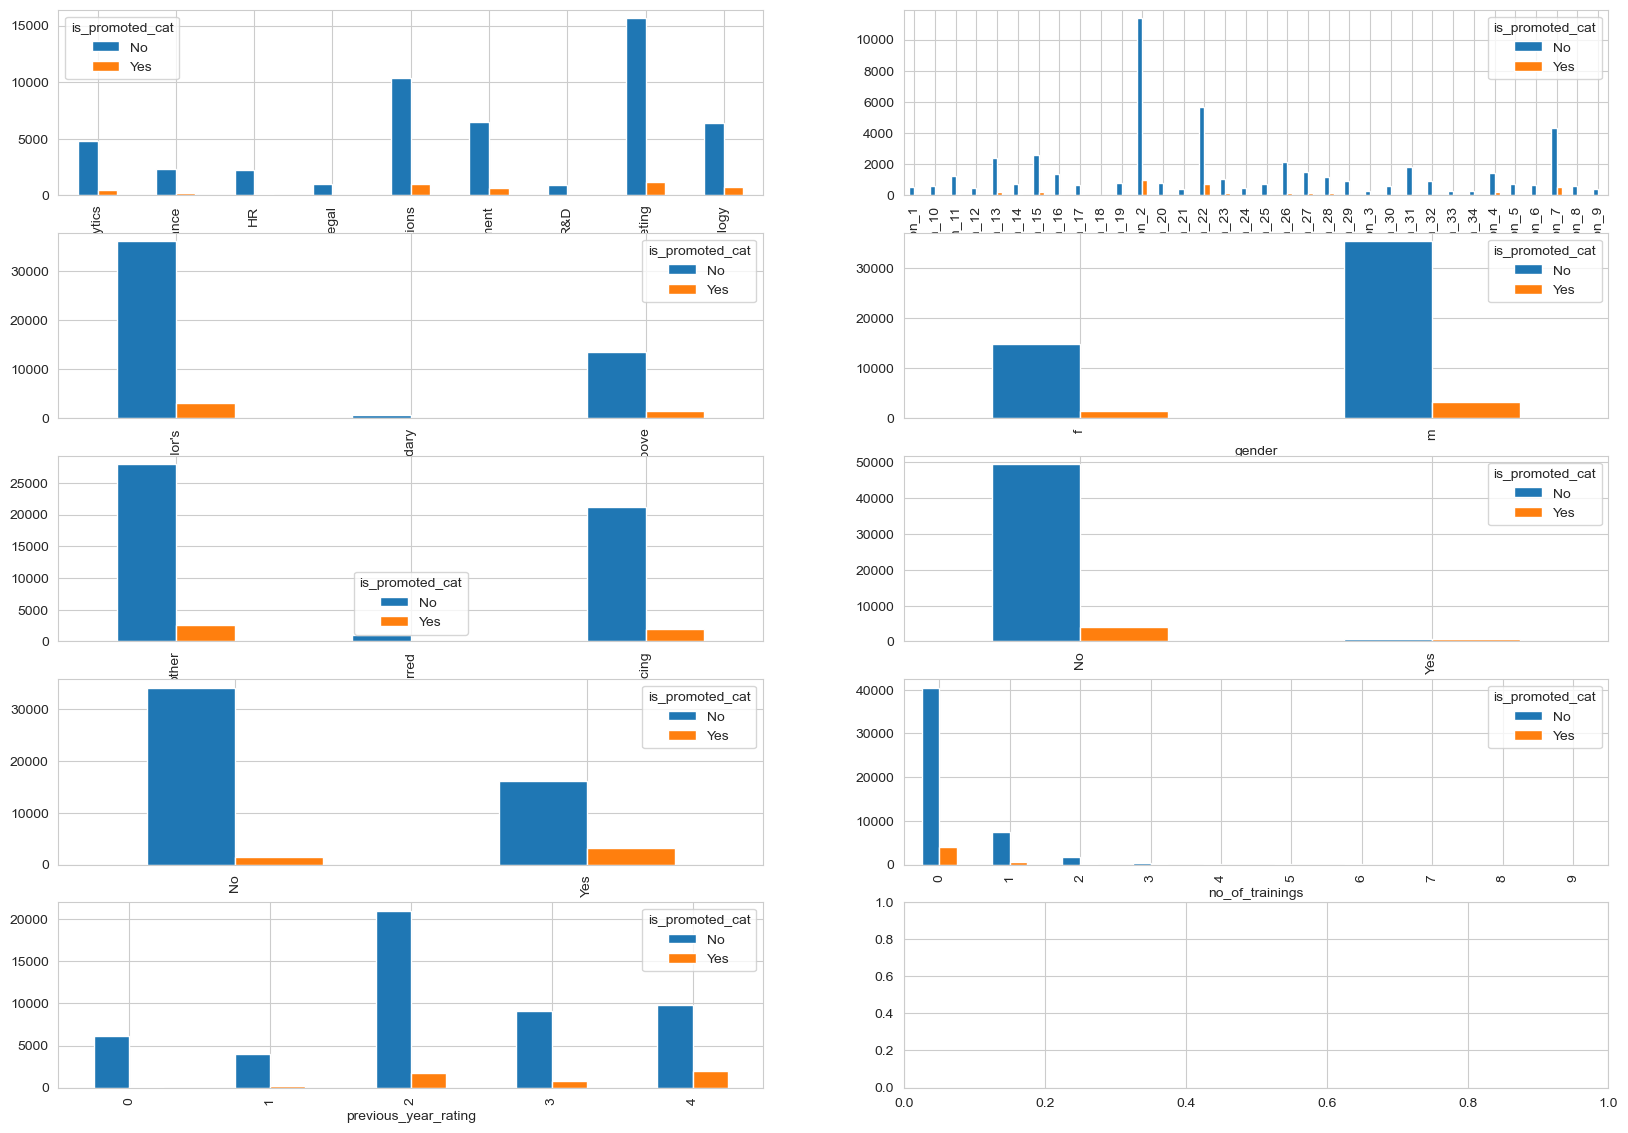

In [180]:
target="is_promoted_cat"
fig,ax = plt.subplots(5,2,figsize=(20,14))
for axi,x in zip(ax.flat,cat_vars):
    col1=hr_df[x]
    col2=hr_df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)


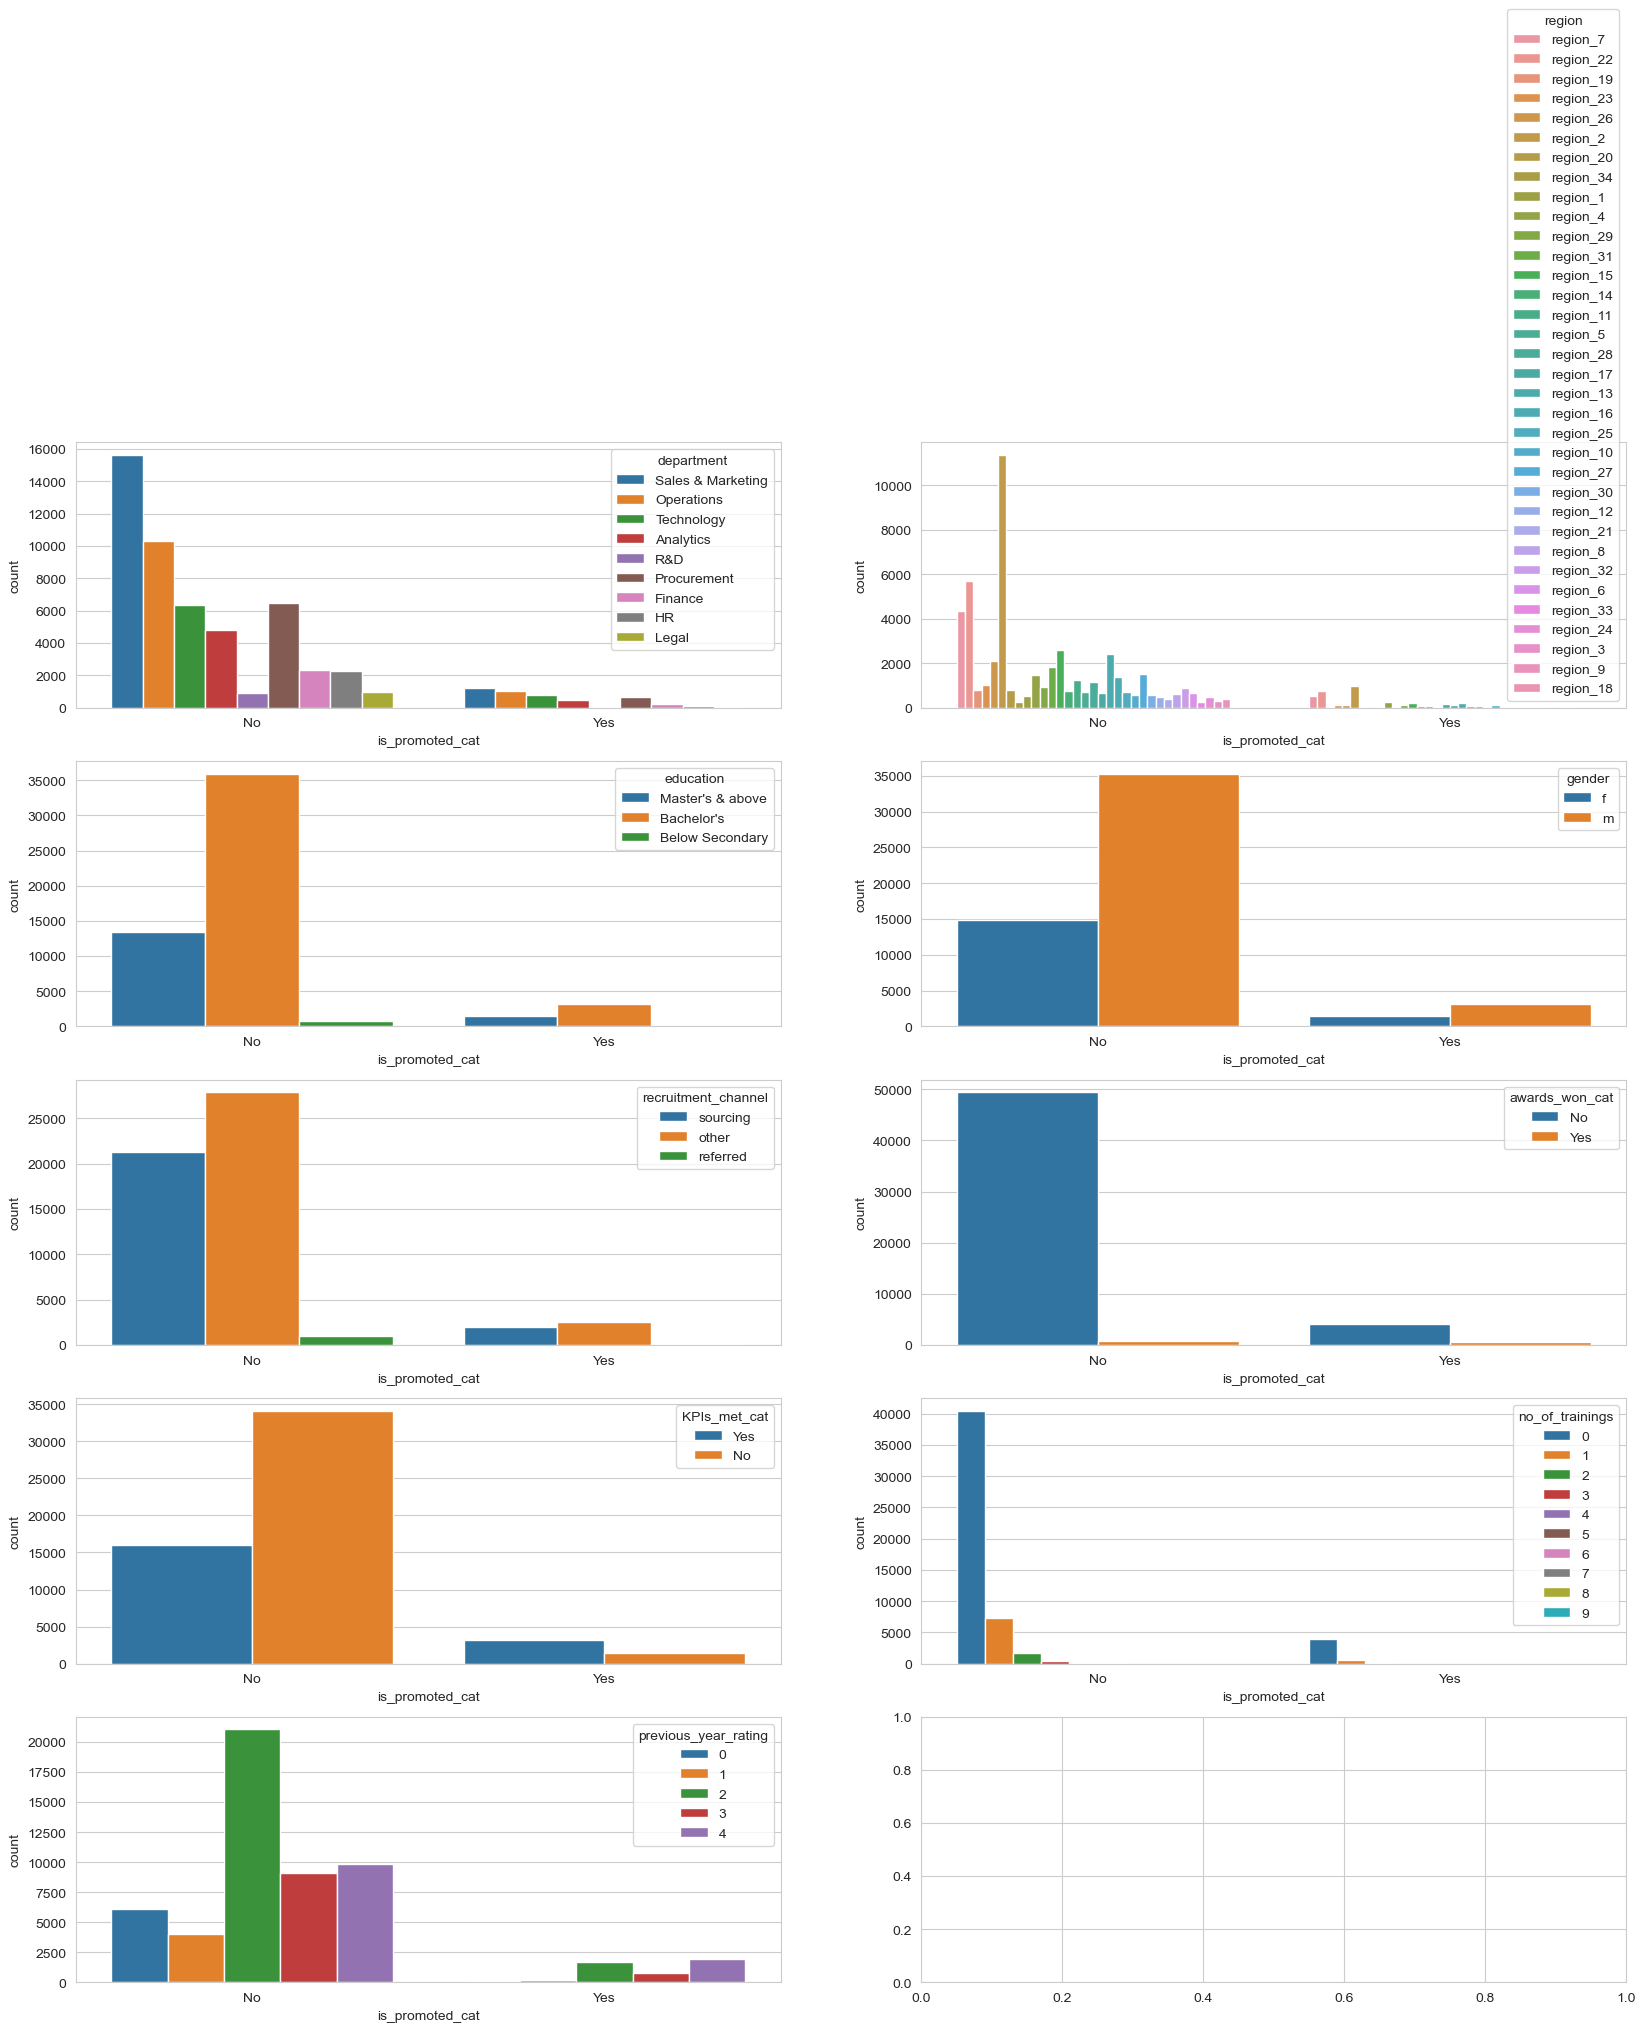

In [181]:
## Cat Vs Cat
fig,ax = plt.subplots(5,2,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=target,hue=x,ax=axi,data=hr_df)

## 9.2 Num vs Num

### Scatter Plots for corelation b/w numerical variables

In [182]:
num_cols1 = hr_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['age', 'length_of_service', 'avg_training_score']

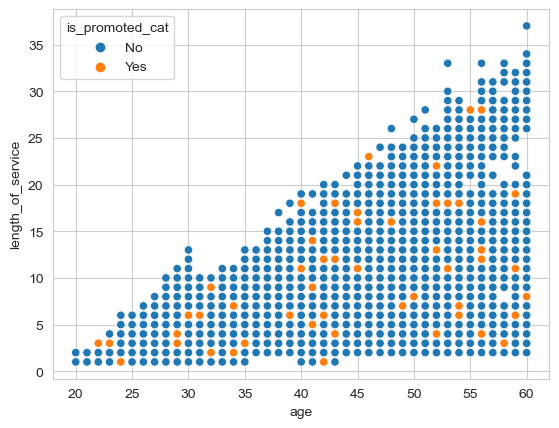

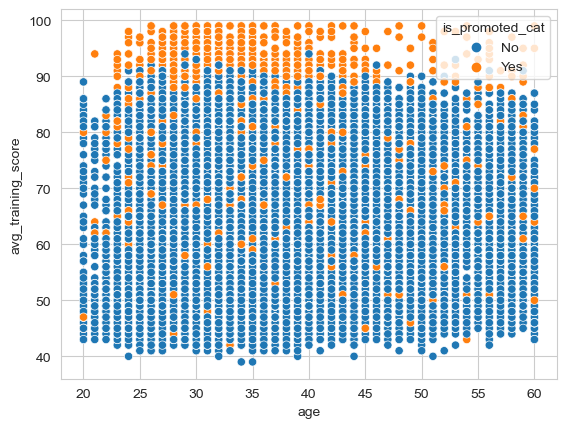

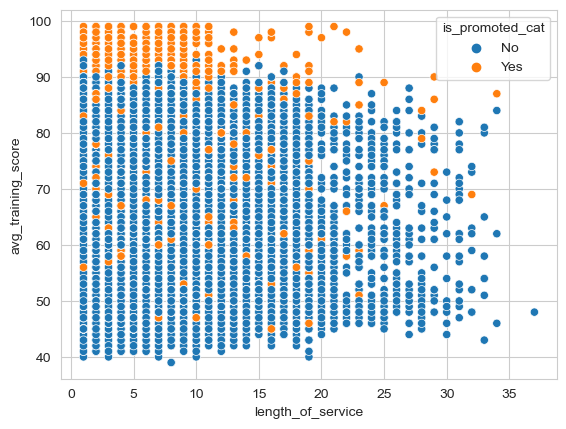

In [183]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue=target,data=hr_df)
            plt.show()
    num_cols2.pop(0)
    

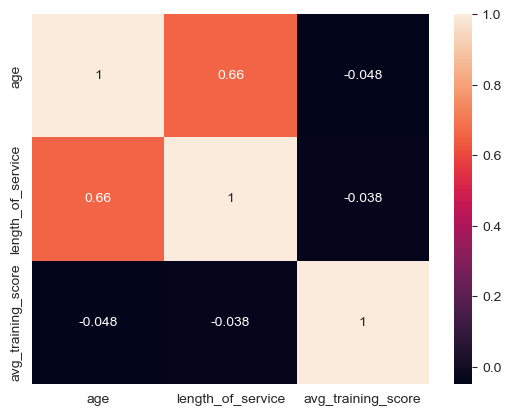

In [184]:
corr_mat=hr_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

In [185]:
hr_df.drop("length_of_service",axis=1,inplace=True)

In [186]:
hr_df.select_dtypes(exclude="object").columns
print(hr_df.select_dtypes(exclude="object").columns)
output_var=target

Index(['age', 'avg_training_score'], dtype='object')


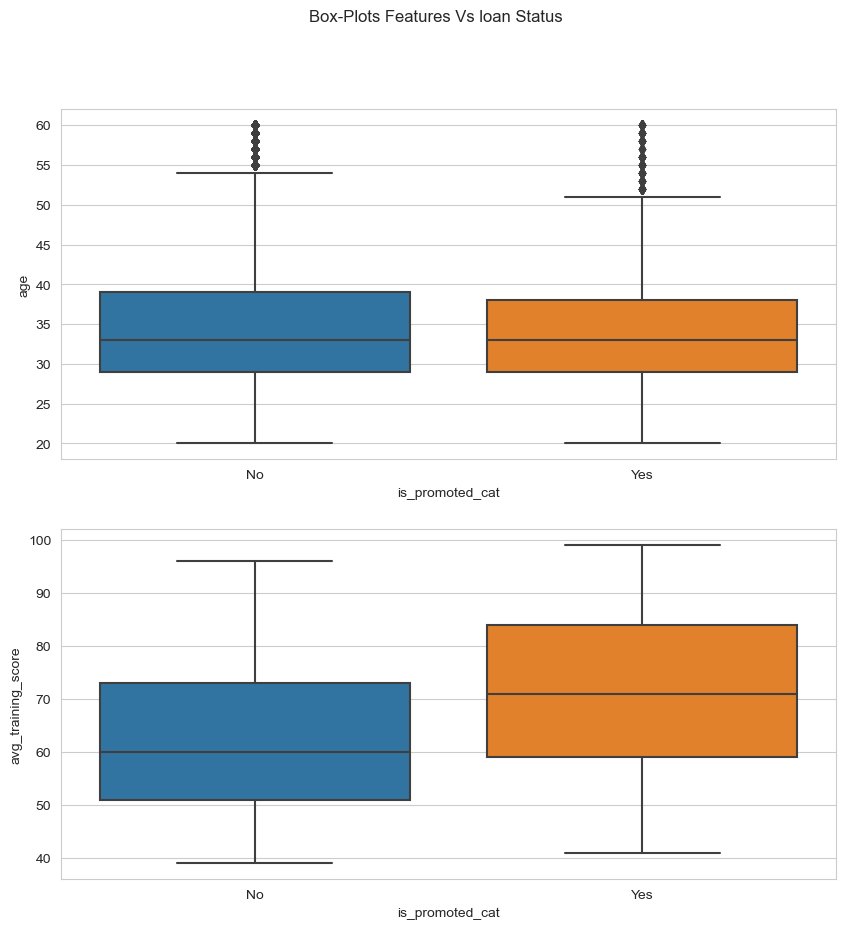

In [187]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0], x=output_var, y='age', data=hr_df)
sns.boxplot(ax=axes[1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

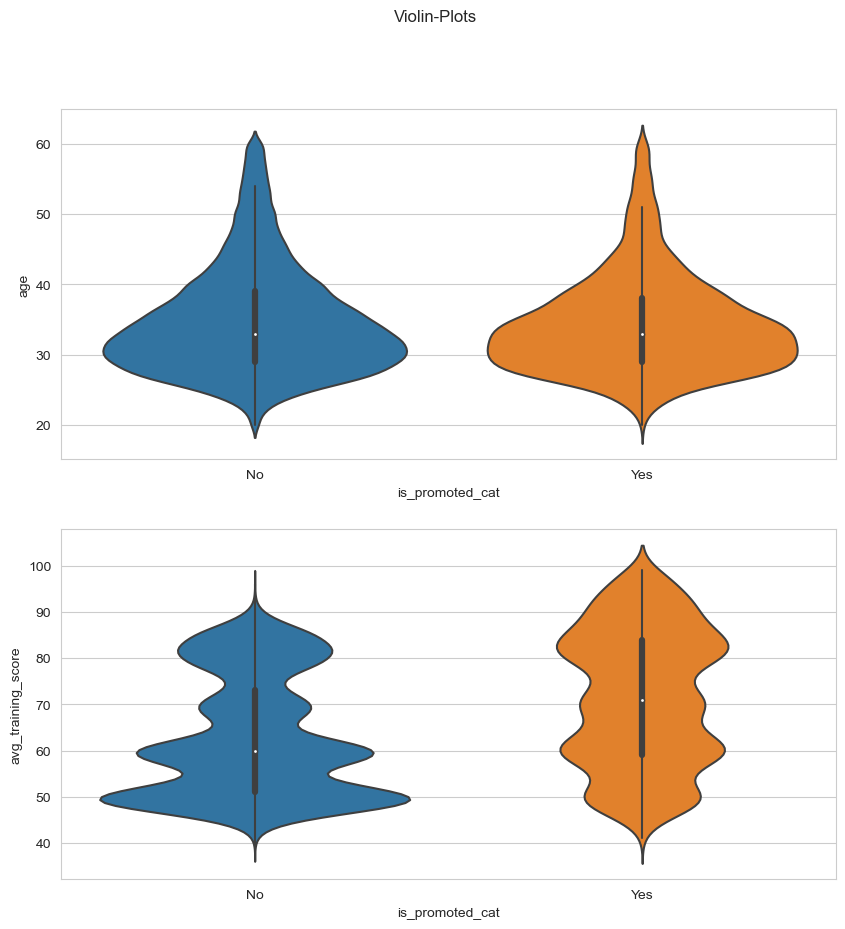

In [188]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var, y='age', data=hr_df)
sns.violinplot(ax=axes[1], x=output_var, y='avg_training_score', data=hr_df)
plt.show()

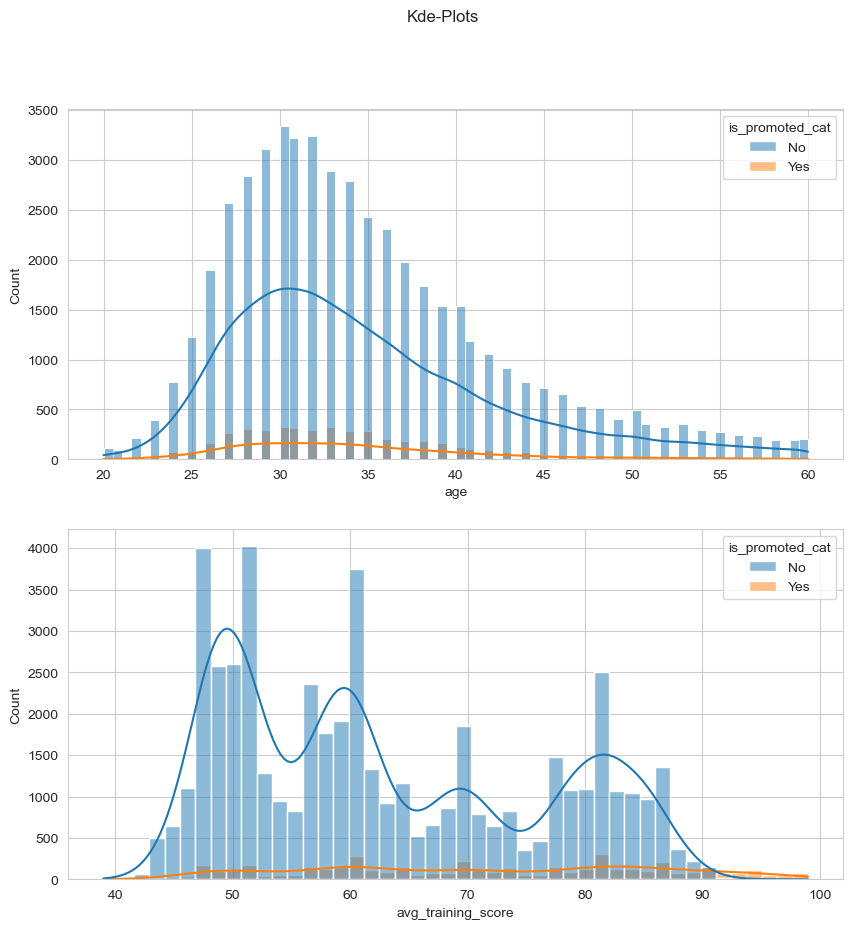

In [189]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var, x='age', data=hr_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var, x='avg_training_score', data=hr_df,kde=True)
plt.show()

# 10. Data Transformation

In [190]:
hr_df.select_dtypes(exclude='object').columns

Index(['age', 'avg_training_score'], dtype='object')

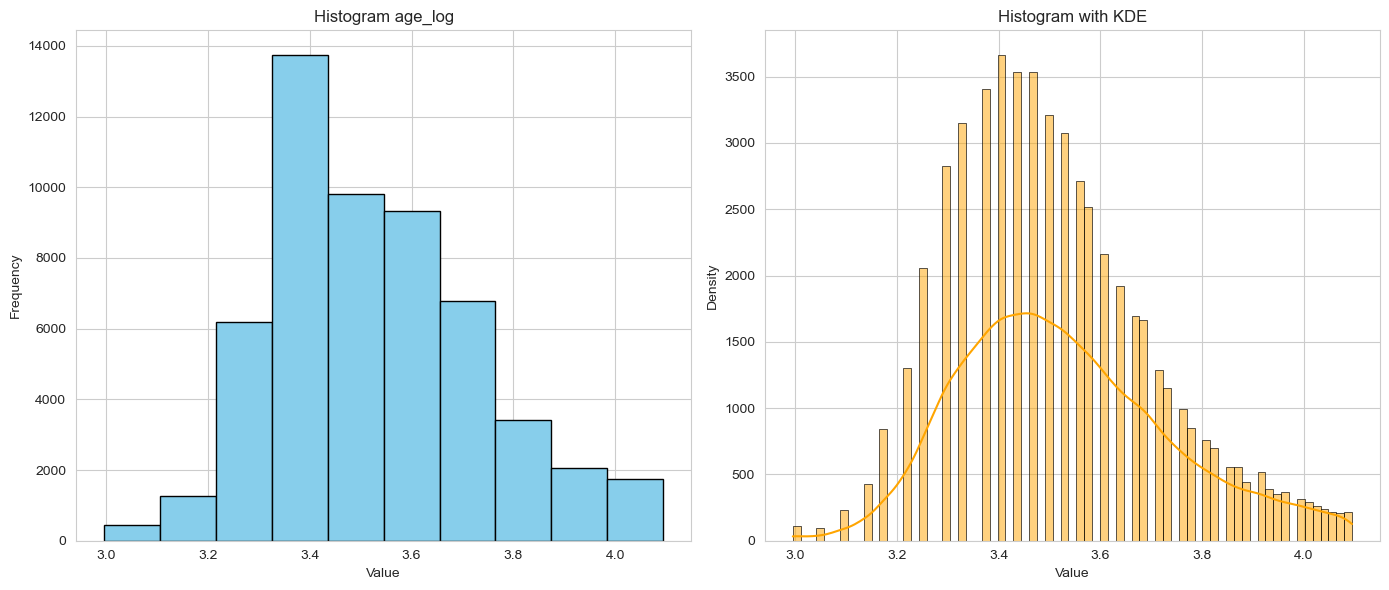

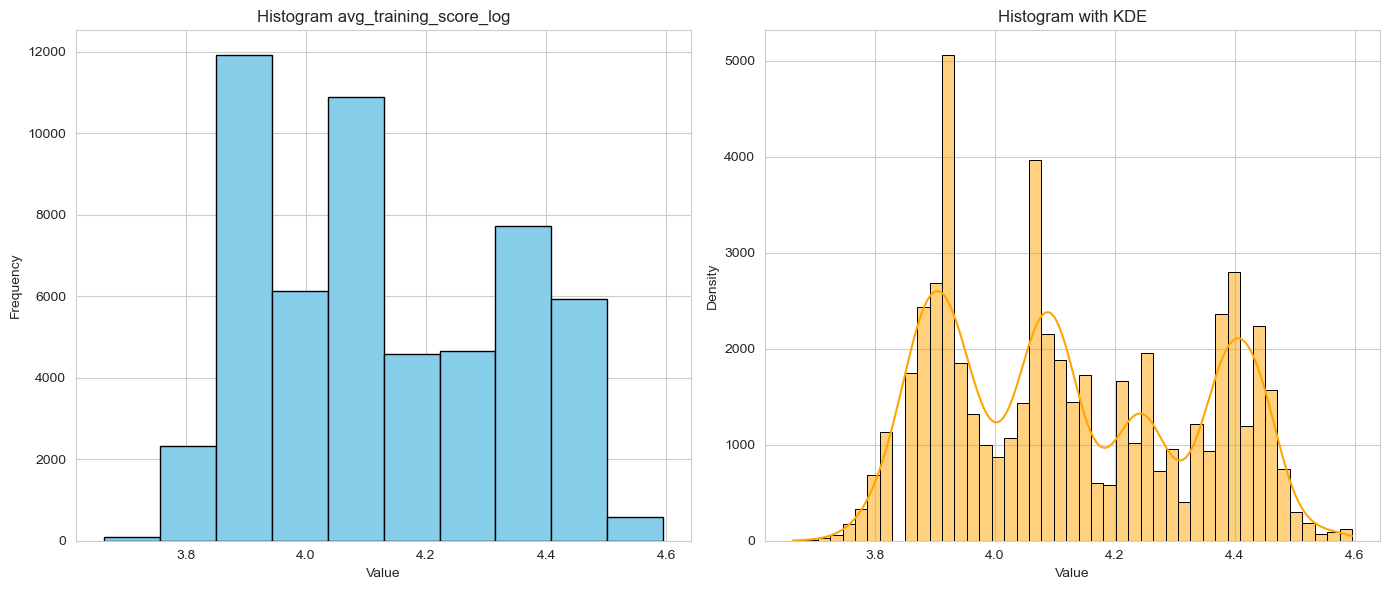

In [191]:
hr_df["age_log"]=np.log(hr_df["age"])
hr_df["avg_training_score_log"]=np.log(hr_df["avg_training_score"])

hr_num_df = hr_df[['age_log', 'avg_training_score_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_num_df)

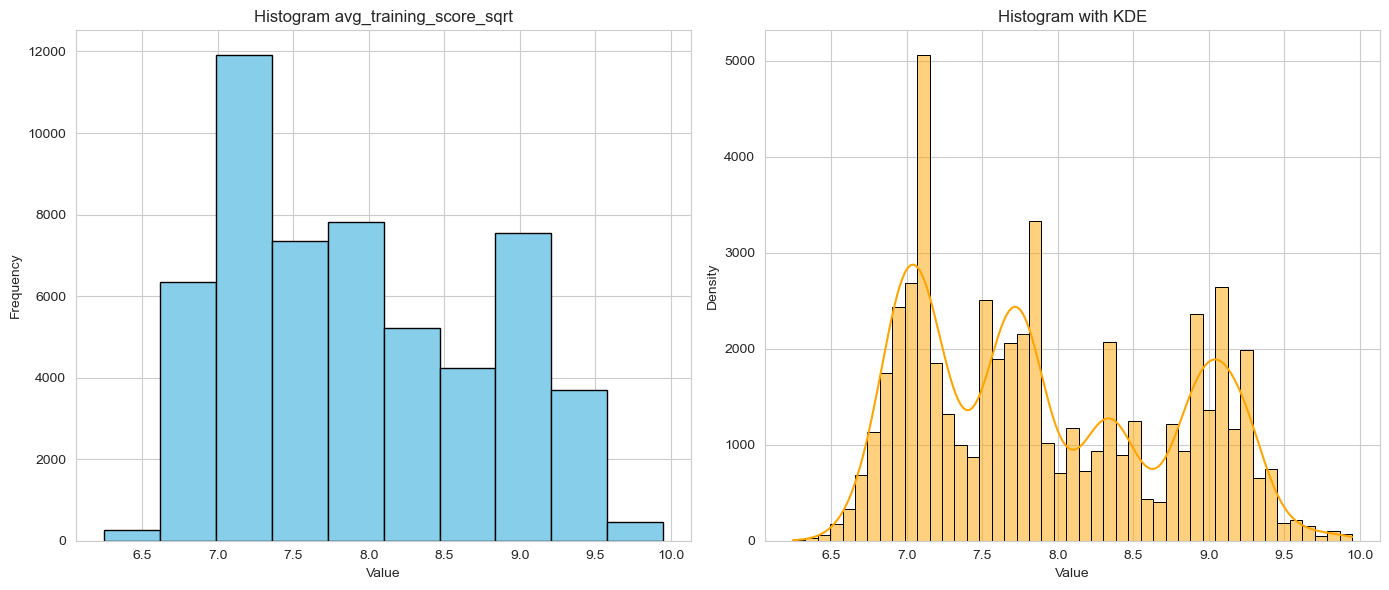

In [192]:
hr_df["avg_training_score_sqrt"]=np.sqrt(hr_df["avg_training_score"])

hr_num_df = hr_df[["avg_training_score_sqrt"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(hr_num_df)

# 11. Standization - Normalization

In [193]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(hr_df[['age_log', 'avg_training_score_log']])

# Replace the original columns with the scaled columns
hr_df[['age_log_stand', 'avg_training_score_log_stand']] = scaled_columns

print(hr_df)

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9        Bachelor's      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel no_of_trainings  age previous_year_rating  \
0                sourcing               0   35                    4   
1                   other               0   30                    4   
2                s

# 12. Convert Cat - to - Numerical Columns

In [194]:
hr_df["previous_year_rating"] = hr_df["previous_year_rating"].astype("int")
hr_df["no_of_trainings"] = hr_df["no_of_trainings"].astype("int")

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
hr_df["is_promoted"]=le.fit_transform(hr_df["is_promoted_cat"])

for var in ['department','region','region', 'education', 'gender', 'recruitment_channel','awards_won_cat','KPIs_met_cat']:
    hr_df[var]=le.fit_transform(hr_df[var])

# 13. SMOTE for Balancing Data

In [196]:
Y=hr_df["is_promoted"]
X=hr_df[[ 'department', 'region','education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat','previous_year_rating', 'no_of_trainings', 'age_log_stand', 'avg_training_score_log_stand']].copy()
print(len(Y),len(X))
print(len(Y),len(X))

54808 54808
54808 54808


In [197]:
X.dtypes

department                        int32
region                            int64
education                         int32
gender                            int32
recruitment_channel               int32
awards_won_cat                    int32
KPIs_met_cat                      int32
previous_year_rating              int32
no_of_trainings                   int32
age_log_stand                   float64
avg_training_score_log_stand    float64
dtype: object

In [198]:
#new_x, new_y = SMOTE().fit_resample(X, Y)
#print(new_x.columns)
#print(len(new_y),len(new_x))

In [199]:
#new_y.value_counts()

# ML Models

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [201]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.9159786525566757
accuracy test score overall : 0.9195402298850575
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.65      0.06      0.11       908

    accuracy                           0.92     10962
   macro avg       0.79      0.53      0.53     10962
weighted avg       0.90      0.92      0.89     10962

[[10025    29]
 [  853    55]]


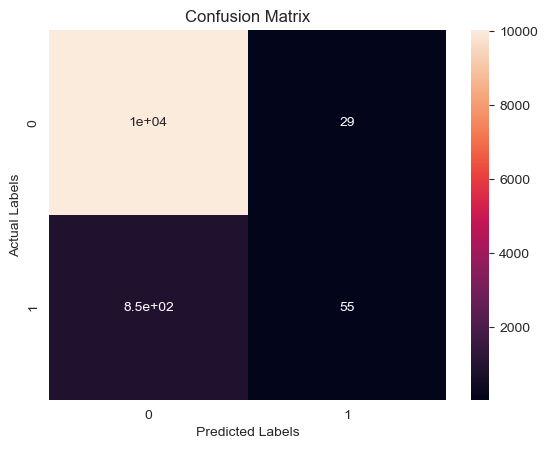

In [202]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.911417233042923
test score 0.9146141215106732
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     10054
           1       0.44      0.12      0.19       908

    accuracy                           0.91     10962
   macro avg       0.68      0.55      0.57     10962
weighted avg       0.89      0.91      0.89     10962

[[9916  138]
 [ 798  110]]


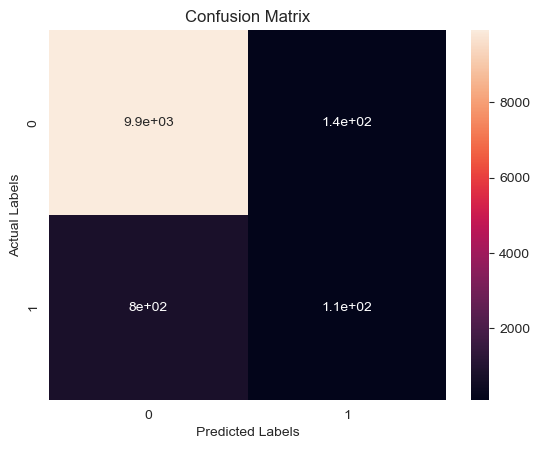

In [203]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 0.9284997491219268
test score: 0.9303959131545338
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.85      0.19      0.32       908

    accuracy                           0.93     10962
   macro avg       0.89      0.60      0.64     10962
weighted avg       0.93      0.93      0.91     10962

[[10023    31]
 [  732   176]]


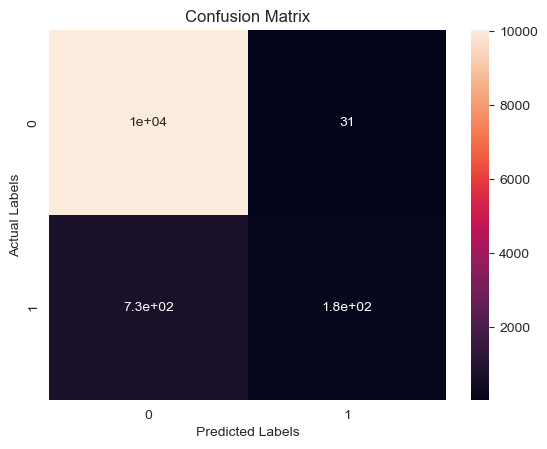

In [204]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Random Forest

Model- Random Forest Tree
train score: 0.9242804360717055
test score: 0.926655719759168
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.94      0.12      0.22       908

    accuracy                           0.93     10962
   macro avg       0.93      0.56      0.59     10962
weighted avg       0.93      0.93      0.90     10962

[[10047     7]
 [  797   111]]


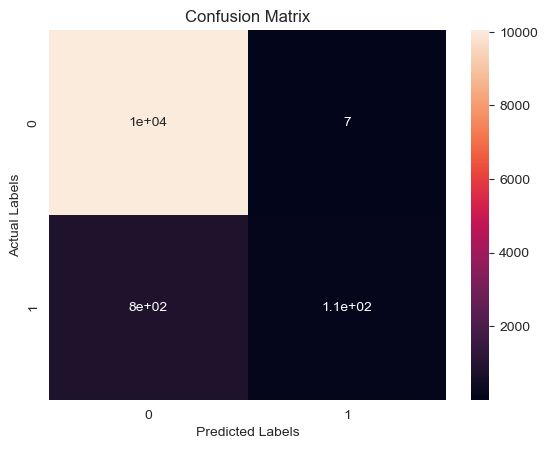

In [205]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

Model-AdaBoost
train score 0.9219997263148292
test score: 0.9250136836343733
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.70      0.17      0.27       908

    accuracy                           0.93     10962
   macro avg       0.81      0.58      0.62     10962
weighted avg       0.91      0.93      0.90     10962

[[9988   66]
 [ 756  152]]


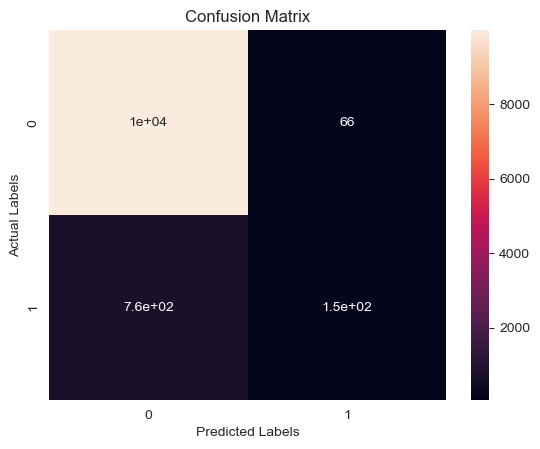

In [206]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.9210874424120786
Test Accuracy: 0.9241014413428207
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.70      0.17      0.27       908

    accuracy                           0.93     10962
   macro avg       0.81      0.58      0.62     10962
weighted avg       0.91      0.93      0.90     10962

[[9988   66]
 [ 756  152]]


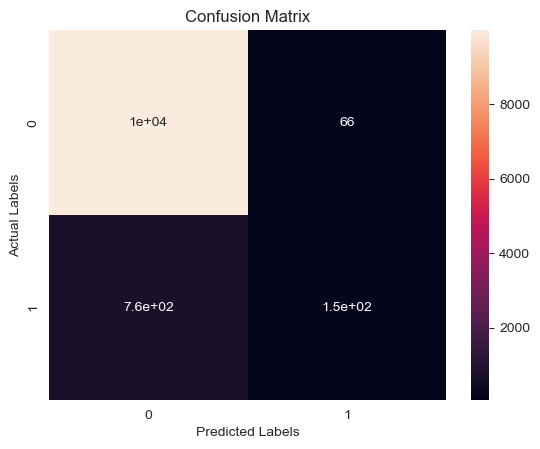

In [207]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Test Accuracy: 0.9486612233727136
Test Accuracy: 0.9421638387155629
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.88      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.91      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

[[10013    41]
 [  593   315]]


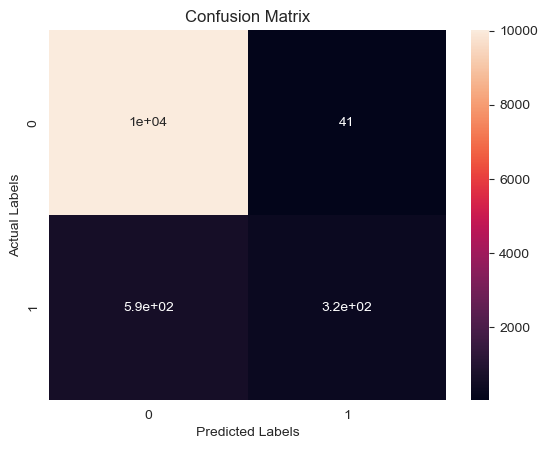

In [208]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Test Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Test data

In [209]:
test_file=r"test_data.csv"
test_df=pd.read_csv(test_file)
test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [210]:
print("check the missing value in each column")
print(test_df.isna().sum())
    
print()
print("table describe")
print(test_df.describe())

check the missing value in each column
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

table describe
        employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          21678.000000   
mean   39041.399149         1.254236     34.782929              3.339146   
std    22640.809201         0.600910      7.679492              1.263294   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000    

In [211]:
education_mode = test_df["education"].mode()[0]
test_df["education"].fillna(education_mode,inplace=True)

In [212]:
print(test_df.isna().sum())

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [213]:
test_df["previous_year_rating"].fillna(3,inplace=True)

In [214]:
print(test_df.isna().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [215]:
# Convert numerical column to categorical column
test_df['awards_won_cat'] = test_df['awards_won?'].map({1: 'Yes', 0: 'No'})
test_df['KPIs_met_cat'] = test_df['KPIs_met >80%'].map({1: 'Yes', 0: 'No'})

In [216]:
for var in ['department', 'region','education', 'gender', 'recruitment_channel','awards_won_cat','KPIs_met_cat','previous_year_rating','no_of_trainings']:
    test_df[var]=le.fit_transform(test_df[var])

In [217]:
test_df.drop(["length_of_service","employee_id","KPIs_met >80%","awards_won?"],axis=1,inplace=True)

In [218]:
test_df.dtypes

department              int32
region                  int32
education               int32
gender                  int32
recruitment_channel     int32
no_of_trainings         int64
age                     int64
previous_year_rating    int64
avg_training_score      int64
awards_won_cat          int32
KPIs_met_cat            int32
dtype: object

In [219]:
test_df["age_log"]=np.log(test_df["age"])
test_df["avg_training_score_log"]=np.log(test_df["avg_training_score"])


In [220]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(test_df[['age_log', 'avg_training_score_log']])

# Replace the original columns with the scaled columns
test_df[['age_log_stand', 'avg_training_score_log_stand']] = scaled_columns

print(test_df)

       department  region  education  gender  recruitment_channel  \
0               8      18          0       1                    2   
1               2      28          0       0                    0   
2               7       4          0       1                    0   
3               5      11          0       0                    0   
4               1      21          0       1                    2   
...           ...     ...        ...     ...                  ...   
23485           3      11          1       1                    2   
23486           8      17          0       1                    2   
23487           2       7          0       0                    2   
23488           5      24          0       1                    2   
23489           8       8          2       1                    0   

       no_of_trainings  age  previous_year_rating  avg_training_score  \
0                    0   24                     2                  77   
1                    0   

In [221]:
final_test=test_df[['department', 'region','education', 'gender', 'recruitment_channel', 'awards_won_cat', 'KPIs_met_cat','previous_year_rating', 'no_of_trainings', 'age_log_stand', 'avg_training_score_log_stand']].copy()

In [222]:
y_pred =  xgmodel.predict(final_test)

In [223]:
output_df = pd.read_csv("sample_submission.csv")

In [224]:
output_df["is_promoted"]=y_pred

In [225]:
output_df.to_csv("output.csv",index=False)